In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# DATA CLEANING & EDA

In [2]:
# This may take a while (~1 min)
!unzip Combined_Flights_2021.csv.zip

Archive:  Combined_Flights_2021.csv.zip
replace Combined_Flights_2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
# load raw data
# This may take a while (2-3 min)
df_raw = pd.read_csv('Combined_Flights_2021.csv')
#df_raw = pd.read_csv(raw_data_path)
df_raw.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,724.0,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,940.0,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,1336.0,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,1703.0,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,1851.0,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0


In [6]:
# get shape of raw data: 6311871 instances, 61 columns
df_raw.shape

(6311871, 61)

In [8]:
# # checking if data is concentrated around specific time of year, month, week
# # - No, we are good.

# # # we can drop year since all records are from 2021
# # df_raw.Year.value_counts()

# # we can keep Quarter
# display(df_raw.Quarter.value_counts())

# # we can keep Month
# display(df_raw.Month.value_counts().sort_index())

# # we can keep DayofMonth, if needed
# display(df_raw.DayofMonth.value_counts().sort_index())

# # we can keep DayOfWeek
# display(df_raw.DayOfWeek.value_counts().sort_index())

In [9]:
df_raw.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [10]:
# select relevant columns
relevant_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime'  # Group 1 - Flight Time
          , 'DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime' # Group 1 - Flight Time
          ,'DOT_ID_Operating_Airline', 'Operating_Airline', 'Airline' # Group 2 - Airline
          ,'Flight_Number_Operating_Airline', 'Tail_Number' # Group 3 - Flight Number & Aircraft Number
          , 'OriginAirportID', 'Origin', 'OriginCityName', 'OriginStateName' # Group 4 - Origin Airport/Location
          , 'DestAirportID', 'Dest', 'DestCityName', 'DestStateName' # Group 5 - Destination Airport/Location
          , 'Distance', 'DistanceGroup' # Group 6 - Distance
         # , 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' # Additional Info - Delay Reasons !cannot find in 2021 data!
          , 'FlightDate' # for convenience
          , 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups' # Target Variables: Departure delays (for Continuous, Binary, and Categorical)
          , 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups'] # Target Variables: Arrival delays (for Continuous, Binary, and Categorical)

df_relevant = df_raw[relevant_columns]
df_relevant.shape

(6311871, 32)

In [11]:
# check null values
df_relevant.isnull().sum().sort_values(ascending = False)

ArrivalDelayGroups                 126001
ArrDel15                           126001
ArrDelayMinutes                    126001
ActualElapsedTime                  126001
ArrTime                            112408
DepDelayMinutes                    108413
DepartureDelayGroups               108413
DepDel15                           108413
DepTime                            108325
Tail_Number                         23303
CRSElapsedTime                          1
FlightDate                              0
DistanceGroup                           0
Distance                                0
DestAirportID                           0
DestStateName                           0
DestCityName                            0
Dest                                    0
Quarter                                 0
OriginStateName                         0
OriginCityName                          0
Month                                   0
OriginAirportID                         0
Flight_Number_Operating_Airline   

In [12]:
# drop rows with NA values, and save as new df
df_relevant_nonull = df_relevant.dropna()

# check null values again
df_relevant_nonull.isnull().sum().sort_values(ascending = False)

Quarter                            0
Month                              0
ArrDel15                           0
ArrDelayMinutes                    0
DepartureDelayGroups               0
DepDel15                           0
DepDelayMinutes                    0
FlightDate                         0
DistanceGroup                      0
Distance                           0
DestStateName                      0
DestCityName                       0
Dest                               0
DestAirportID                      0
OriginStateName                    0
OriginCityName                     0
Origin                             0
OriginAirportID                    0
Tail_Number                        0
Flight_Number_Operating_Airline    0
Airline                            0
Operating_Airline                  0
DOT_ID_Operating_Airline           0
CRSElapsedTime                     0
ActualElapsedTime                  0
ArrTime                            0
DepTime                            0
C

In [13]:
df_relevant_nonull.tail(5)

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,...,DestStateName,Distance,DistanceGroup,FlightDate,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups
6311866,2,6,1,2,1255,1430,1301.0,1421.0,80.0,95.0,...,Illinois,395.0,2,2021-06-01,6.0,0.0,0.0,0.0,0.0,-1.0
6311867,2,6,1,2,730,900,727.0,845.0,78.0,90.0,...,Illinois,395.0,2,2021-06-01,0.0,0.0,-1.0,0.0,0.0,-1.0
6311868,2,6,1,2,800,1110,757.0,1101.0,124.0,130.0,...,Florida,806.0,4,2021-06-01,0.0,0.0,-1.0,0.0,0.0,-1.0
6311869,2,6,1,2,1300,1620,1252.0,1559.0,127.0,140.0,...,Florida,806.0,4,2021-06-01,0.0,0.0,-1.0,0.0,0.0,-2.0
6311870,2,6,1,2,1925,2055,1948.0,2116.0,88.0,90.0,...,Wisconsin,475.0,2,2021-06-01,23.0,1.0,1.0,21.0,1.0,1.0


In [14]:
# check shape
df_relevant_nonull.shape

(6185870, 32)

In [15]:
# check data types
df_relevant_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6185870 entries, 0 to 6311870
Data columns (total 32 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Quarter                          int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   CRSDepTime                       int64  
 5   CRSArrTime                       int64  
 6   DepTime                          float64
 7   ArrTime                          float64
 8   ActualElapsedTime                float64
 9   CRSElapsedTime                   float64
 10  DOT_ID_Operating_Airline         int64  
 11  Operating_Airline                object 
 12  Airline                          object 
 13  Flight_Number_Operating_Airline  int64  
 14  Tail_Number                      object 
 15  OriginAirportID                  int64  
 16  Origin                           object 
 17  OriginCityNam

In [16]:
df_relevant_nonull.describe()

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,...,OriginAirportID,DestAirportID,Distance,DistanceGroup,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups
count,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,...,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06
mean,2.650939e+00,6.971771e+00,1.578911e+01,4.014697e+00,1.322929e+03,1.497352e+03,1.326691e+03,1.476631e+03,1.344372e+02,1.405494e+02,...,1.265947e+04,1.266003e+04,7.960703e+02,3.655958e+00,1.269843e+01,1.726684e-01,-1.899636e-02,1.252928e+01,1.726611e-01,-3.158285e-01
std,1.076774e+00,3.298142e+00,8.786713e+00,2.003742e+00,4.739252e+02,4.943002e+02,4.868880e+02,5.134284e+02,7.023792e+01,7.042517e+01,...,1.533544e+03,1.533821e+03,5.843526e+02,2.285352e+00,4.717305e+01,3.779603e-01,2.129504e+00,4.674770e+01,3.779540e-01,2.266604e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.920000e+02,...,1.013500e+04,1.013500e+04,3.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00
25%,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,9.200000e+02,1.118000e+03,9.220000e+02,1.105000e+03,8.300000e+01,9.000000e+01,...,1.129200e+04,1.129200e+04,3.700000e+02,2.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00
50%,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.315000e+03,1.520000e+03,1.320000e+03,1.509000e+03,1.180000e+02,1.240000e+02,...,1.288900e+04,1.288900e+04,6.460000e+02,3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
75%,4.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,1.721000e+03,1.913000e+03,1.729000e+03,1.909000e+03,1.650000e+02,1.700000e+02,...,1.405700e+04,1.405700e+04,1.034000e+03,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.400000e+03,2.400000e+03,7.940000e+02,1.312000e+03,...,1.686900e+04,1.686900e+04,5.812000e+03,1.100000e+01,3.095000e+03,1.000000e+00,1.200000e+01,3.089000e+03,1.000000e+00,1.200000e+01


In [17]:
df_relevant_nonull.ArrDel15.value_counts().sort_index()

ArrDel15
0.0    5117811
1.0    1068059
Name: count, dtype: int64

In [18]:
df_relevant_nonull.DepDel15.value_counts().sort_index()

DepDel15
0.0    5117766
1.0    1068104
Name: count, dtype: int64

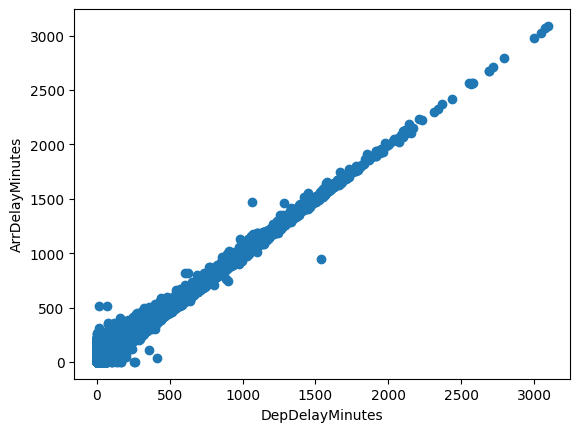

In [19]:
# Arrival delay is strongly linearly correlated with departure delay.
# Consider using Arrival Delay only. We probably care more about arrival delay than departure delay (if key stakeholders are passengers).
plt.scatter(df_relevant_nonull.DepDelayMinutes, df_relevant_nonull.ArrDelayMinutes)
plt.xlabel('DepDelayMinutes')
plt.ylabel('ArrDelayMinutes')
plt.show()

In [20]:
DepartureDelayGroups_table = df_relevant_nonull.DepartureDelayGroups.value_counts().sort_index()
DepartureDelayGroups_table

DepartureDelayGroups
-2.0       30396
-1.0     3798707
 0.0     1288663
 1.0      388704
 2.0      199691
 3.0      122998
 4.0       82504
 5.0       58181
 6.0       43344
 7.0       32759
 8.0       25203
 9.0       19763
 10.0      15840
 11.0      12683
 12.0      66434
Name: count, dtype: int64

In [21]:
ArrivalDelayGroups_table = df_relevant_nonull.ArrivalDelayGroups.value_counts().sort_index()
ArrivalDelayGroups_table

ArrivalDelayGroups
-2.0     1583783
-1.0     2466704
 0.0     1067324
 1.0      401559
 2.0      199467
 3.0      119535
 4.0       79751
 5.0       56743
 6.0       42103
 7.0       31781
 8.0       24765
 9.0       19838
 10.0      15457
 11.0      12258
 12.0      64802
Name: count, dtype: int64

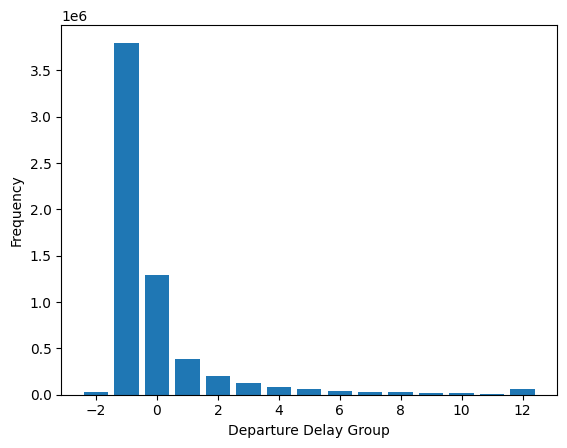

In [22]:
plt.bar(DepartureDelayGroups_table.index, DepartureDelayGroups_table.values)
plt.xlabel('Departure Delay Group')
plt.ylabel('Frequency')
plt.show()

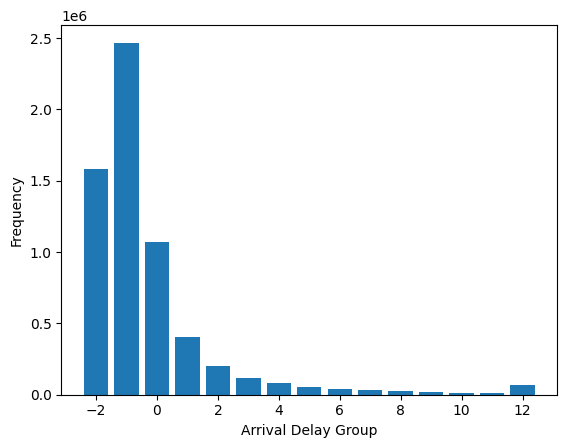

In [23]:
plt.bar(ArrivalDelayGroups_table.index, ArrivalDelayGroups_table.values)
plt.xlabel('Arrival Delay Group')
plt.ylabel('Frequency')
plt.show()

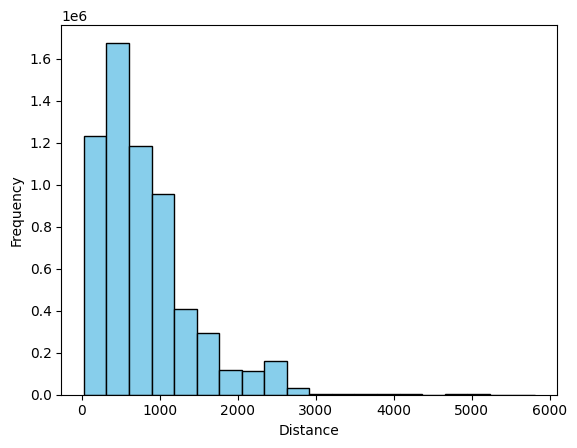

In [24]:
# distance is right skewed
plt.hist(df_relevant_nonull.Distance, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

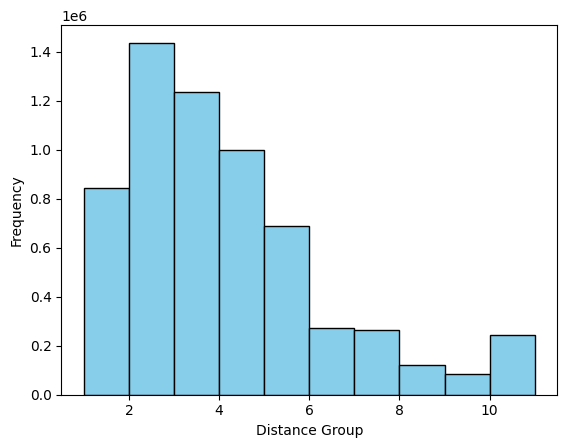

In [25]:
# distance is right skewed
plt.hist(df_relevant_nonull.DistanceGroup, color='skyblue', edgecolor='black')
plt.xlabel('Distance Group')
plt.ylabel('Frequency')
plt.show()

In [26]:
df_relevant_nonull_numerical = df_relevant_nonull.select_dtypes(include='number')
df_relevant_nonull_numerical.shape

(6185870, 22)

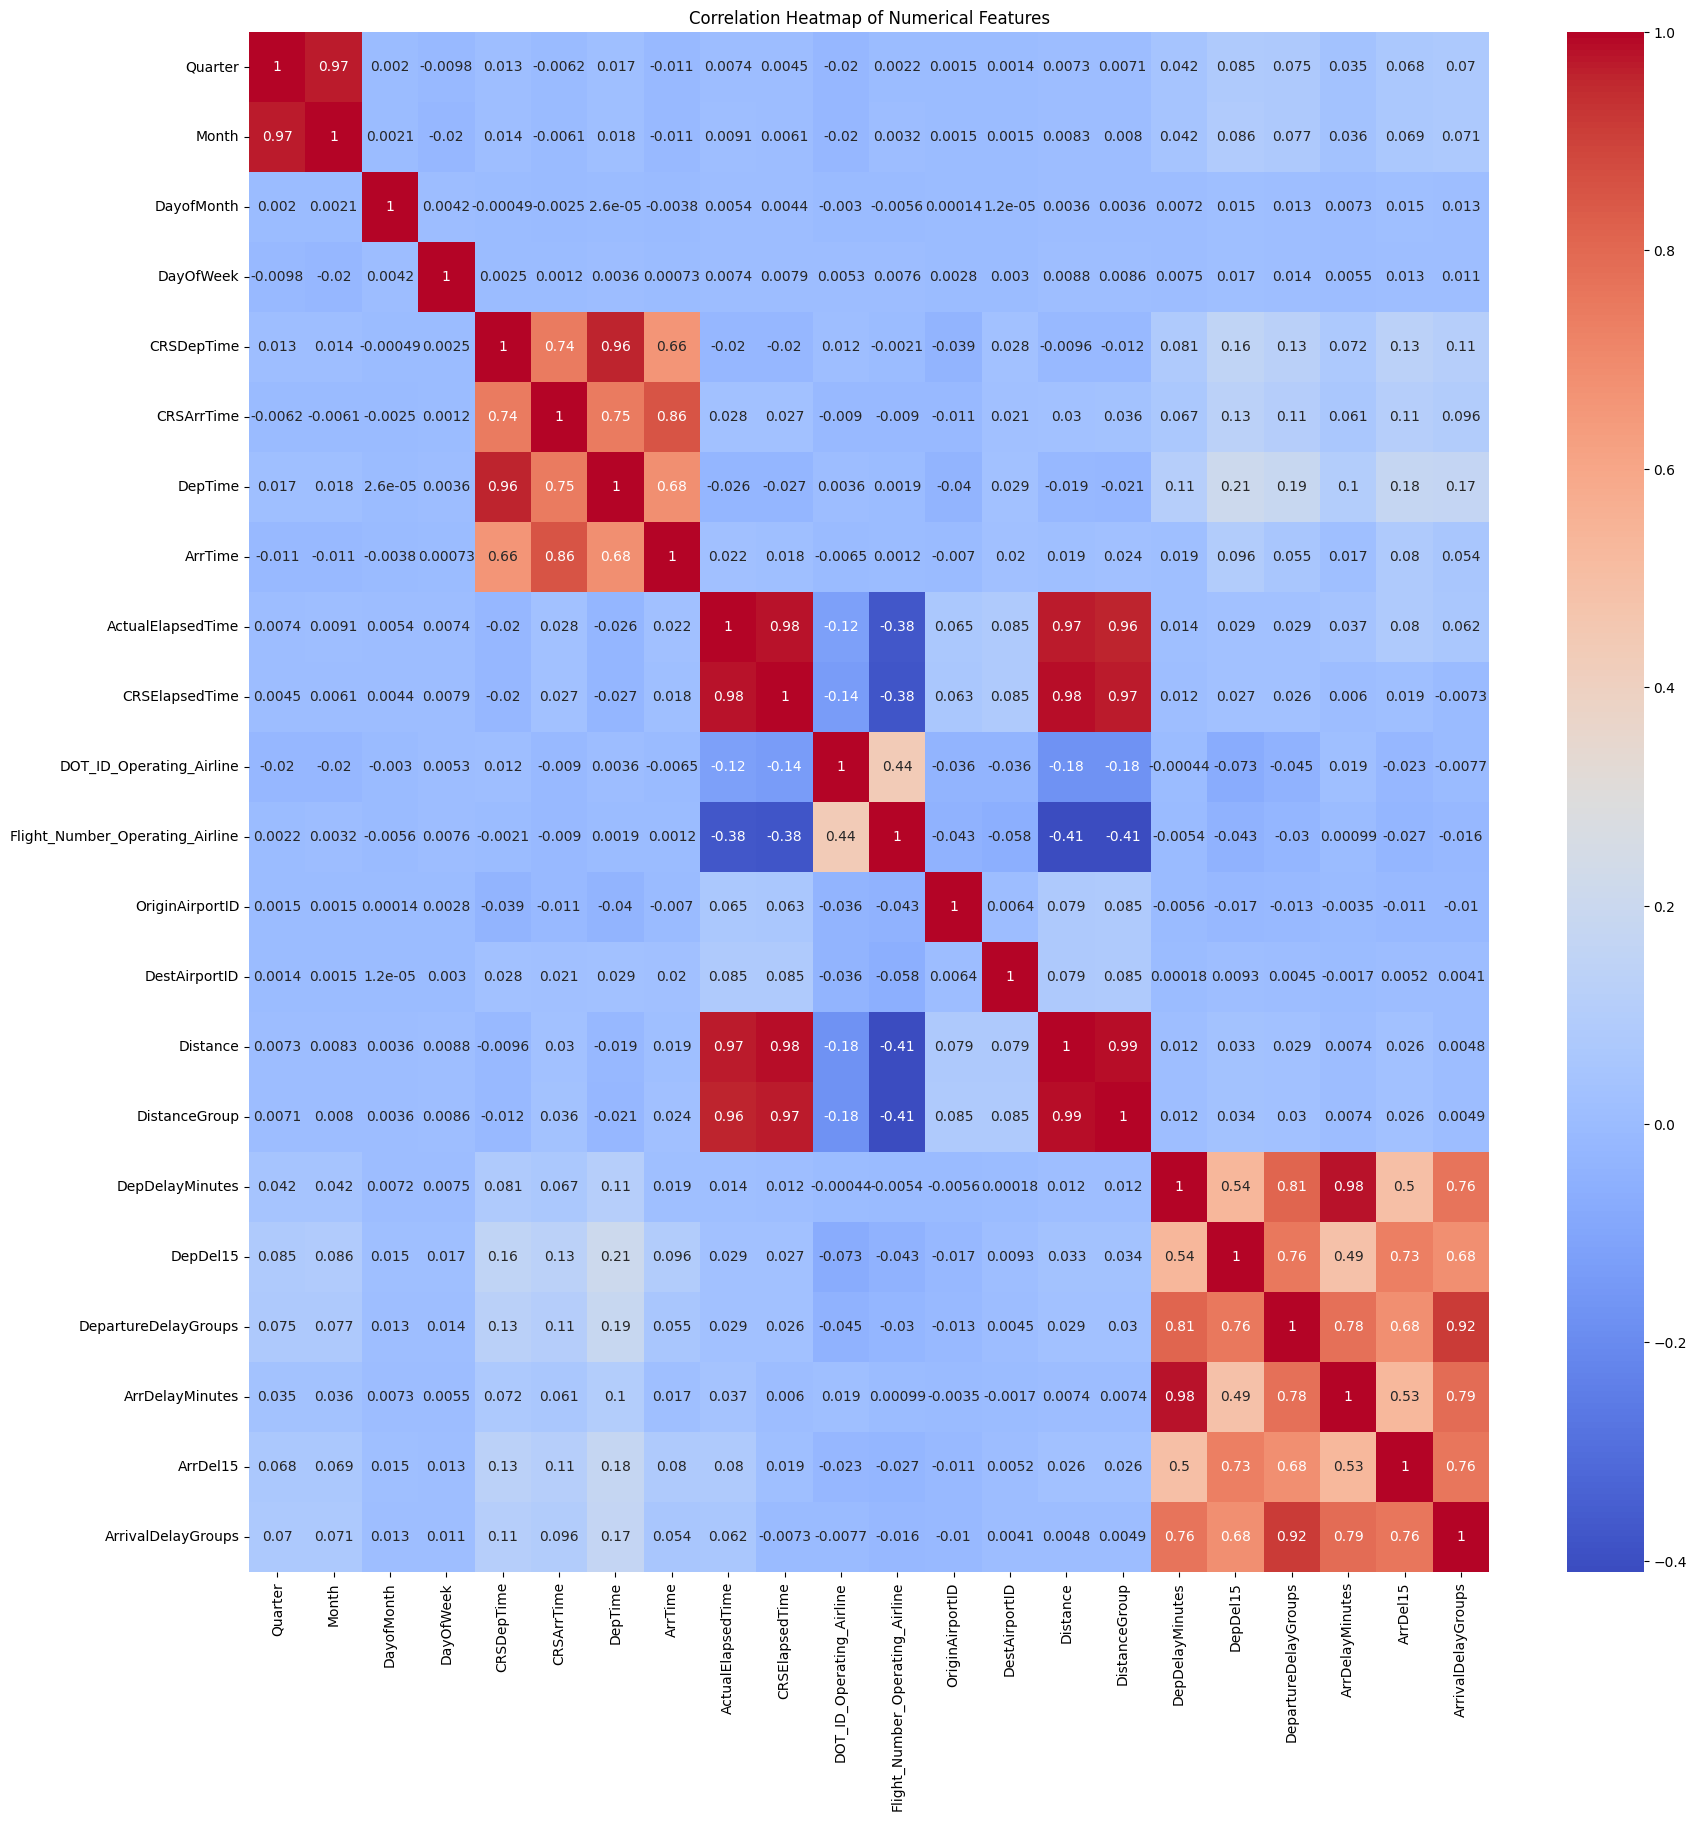

In [27]:
# check correlation
correlation_matrix_scores = df_relevant_nonull_numerical.corr()

# Plot heatmap of correlations
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_scores, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

When selecting the following features, select only 1 feature in each group due to correlation (or because they basically mean the same thing):  

1. Quarter & Month
2. CRSDepTime & CRSArrTime
3. DOT_ID_Operating_Airline, Operating_Airline, Airline
4. OriginAirportID, Origin, OriginCityName
5. DestAirportID, Dest, DestCityName
6. Distance & DistanceGroup


When selecting a target variable, select 1 based on your type of prediction:

1. Continuous Prediction: ArrDelayMinutes
2. Binary Prediction: ArrDel15
3. Categorical Prediction: ArrivalDelayGroups

In [25]:
# This may take a while. (2-3 minutes)
df_relevant_nonull.to_csv('Cleaned_Combined_Flights_2021.csv')

# FEATURE ENGINEERING

### New Features

In [28]:
# Create a new categorical variable for Weekdays vs. Weekends
def weekday_or_weekend(day):
    if day in [6, 7]:  # Saturday (6) and Sunday (7)
        return 'Weekend'
    else:
        return 'Weekday'


df_relevant_nonull = df_relevant_nonull.copy()
# Apply the function to the 'DayOfWeek' column
df_relevant_nonull['WeekdayOrWeekend'] = df_relevant_nonull['DayOfWeek'].apply(weekday_or_weekend)

In [29]:
df_relevant_nonull['FlightDate'] = pd.to_datetime(df_relevant_nonull['FlightDate'])

# Extract useful time-based features
df_relevant_nonull['Season'] = df_relevant_nonull['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                              'Spring' if x in [3, 4, 5] else
                                              'Summer' if x in [6, 7, 8] else
                                              'Fall')  # Add season based on the month

In [30]:
# Create a uniform time scale (minutes)
def time_to_minutes(time):
    # Extract hours and minutes, handling edge cases like NaN
    if pd.isnull(time):
        return 0
    hours = time // 100
    minutes = time % 100
    return hours * 60 + minutes

# Apply the conversion
df_relevant_nonull['CRSDepTimeMinutes'] = df_relevant_nonull['CRSDepTime'].apply(time_to_minutes)
df_relevant_nonull['DepTimeMinutes'] = df_relevant_nonull['DepTime'].apply(time_to_minutes)

# Calculate Arr_deviation
# 1. Departure Deviation
df_relevant_nonull['DepDeviation'] = df_relevant_nonull['DepTimeMinutes'] - df_relevant_nonull['CRSDepTimeMinutes']

# 2. In-Flight Duration Deviation
df_relevant_nonull['DurationDeviation'] = df_relevant_nonull['ActualElapsedTime'] - df_relevant_nonull['CRSElapsedTime']

# Combine both to calculate Arr_deviation
df_relevant_nonull['Arr_deviation'] = df_relevant_nonull['DepDeviation'] + df_relevant_nonull['DurationDeviation']

#Drop irrelevant columns
df_relevant_nonull.drop(['DepDeviation', 'DurationDeviation'], axis=1, inplace=True)

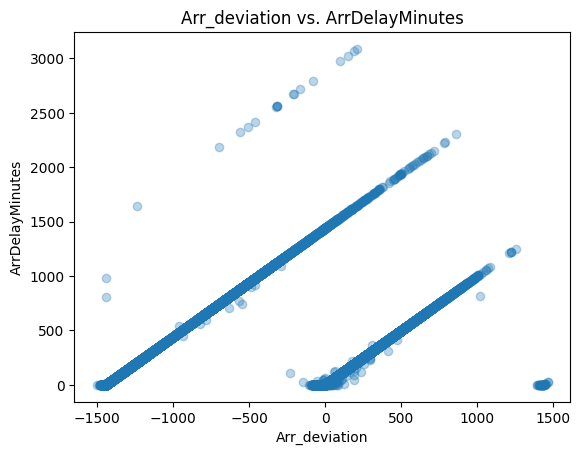

In [31]:
#Assess correlation of new feature
# Scatter plot of Arr_deviation vs ArrDelayMinutes
plt.scatter(df_relevant_nonull['Arr_deviation'], df_relevant_nonull['ArrDelayMinutes'], alpha=0.3)
plt.xlabel('Arr_deviation')
plt.ylabel('ArrDelayMinutes')
plt.title('Arr_deviation vs. ArrDelayMinutes')
plt.show()

In [32]:
#Low correlation, hence to provide more predictive benefits
correlation = df_relevant_nonull[['Arr_deviation', 'ArrDelayMinutes']].corr()
print(correlation)

                 Arr_deviation  ArrDelayMinutes
Arr_deviation         1.000000         0.133804
ArrDelayMinutes       0.133804         1.000000


In [33]:
#Proxy for Tail_number

# Avg number of delay minutes per aircraft (Tail_Number)
avg_delays_per_aircraft = df_relevant_nonull.groupby('Tail_Number')['DepDelayMinutes'].mean()

# Map the average delay back to the original DataFrame
df_relevant_nonull['AvgDelaysPerAircraft'] = df_relevant_nonull['Tail_Number'].map(avg_delays_per_aircraft)

# Replace NaN with 0 for aircraft with no recorded delays
df_relevant_nonull['AvgDelaysPerAircraft'].fillna(0, inplace=True)

In [34]:
# Total number of flights per airline
total_flights_per_airline = df_relevant_nonull['Airline'].value_counts()

# Count the number of unique flight dates
unique_flight_dates = df_relevant_nonull['FlightDate'].nunique()

# Calculate the average number of flights per day for each airline
avg_flights_per_day_per_airline = total_flights_per_airline / unique_flight_dates

# Map the average flights per day back to the original DataFrame
df_relevant_nonull['AvgFlightsPerDay'] = df_relevant_nonull['Airline'].map(avg_flights_per_day_per_airline)


In [35]:
#Proxy feature for categorical airport features

total_flights = len(df_relevant_nonull)

# Total number of flights per Origin airport
origin_capacity = df_relevant_nonull.groupby('Origin')['FlightDate'].count().reset_index()
origin_capacity.rename(columns={'FlightDate': 'TotalFlightsFromOrigin'}, inplace=True)

# Merge Origin capacity
df_relevant_nonull = df_relevant_nonull.merge(origin_capacity, on='Origin', how='left')
df_relevant_nonull.rename(columns={'TotalFlightsFromOrigin': 'Origin_capacity'}, inplace=True)
df_relevant_nonull['Origin_capacity'] = (df_relevant_nonull['Origin_capacity']/total_flights).round(4)


# Total number of flights for each destination airport
dest_capacity = df_relevant_nonull.groupby('Dest')['FlightDate'].count().reset_index()
dest_capacity.rename(columns={'FlightDate': 'TotalFlightsToDest'}, inplace=True)

# Merge Destination capacity
df_relevant_nonull = df_relevant_nonull.merge(dest_capacity, on='Dest', how='left')
df_relevant_nonull.rename(columns={'TotalFlightsToDest': 'Dest_capacity'}, inplace=True)
df_relevant_nonull['Dest_capacity'] = (df_relevant_nonull['Dest_capacity']/total_flights).round(4)

### One-Hot Encoding

In [36]:
df_relevant_nonull = pd.get_dummies(df_relevant_nonull, columns=['WeekdayOrWeekend'], prefix='Is')

#Keep only is_Weekend due to perfect correlation?
#df_relevant_nonull = df_relevant_nonull.drop(columns=['Is_Weekday'])

In [37]:
# One-hot encode the 'Season' column
df_relevant_nonull = pd.get_dummies(df_relevant_nonull, columns=['Season'], prefix='Is')

In [38]:
categorical_columns = df_relevant_nonull.select_dtypes(include=['object'])
print(categorical_columns.head())

  Operating_Airline                Airline Tail_Number Origin  \
0                OO  SkyWest Airlines Inc.      N728SK    SGU   
1                OO  SkyWest Airlines Inc.      N752SK    PHX   
2                OO  SkyWest Airlines Inc.      N766SK    MHT   
3                OO  SkyWest Airlines Inc.      N752EV    DFW   
4                OO  SkyWest Airlines Inc.      N715SK    PHX   

          OriginCityName OriginStateName Dest  \
0         St. George, UT            Utah  PHX   
1            Phoenix, AZ         Arizona  SGU   
2         Manchester, NH   New Hampshire  ORD   
3  Dallas/Fort Worth, TX           Texas  TRI   
4            Phoenix, AZ         Arizona  BFL   

                         DestCityName DestStateName  
0                         Phoenix, AZ       Arizona  
1                      St. George, UT          Utah  
2                         Chicago, IL      Illinois  
3  Bristol/Johnson City/Kingsport, TN     Tennessee  
4                     Bakersfield, CA    Cal

In [ ]:
#View unique values
# df_relevant_nonull['Operating_Airline'].value_counts()

In [39]:
# One-hot encode the 'Operating Arline' column
df_relevant_nonull = pd.get_dummies(df_relevant_nonull, columns=['Airline'])

In [40]:
df_relevant_nonull.tail()

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,...,"Airline_GoJet Airlines, LLC d/b/a United Express",Airline_Hawaiian Airlines Inc.,Airline_Horizon Air,Airline_JetBlue Airways,Airline_Mesa Airlines Inc.,Airline_Republic Airlines,Airline_SkyWest Airlines Inc.,Airline_Southwest Airlines Co.,Airline_Spirit Air Lines,Airline_United Air Lines Inc.
6185865,2,6,1,2,1255,1430,1301.0,1421.0,80.0,95.0,...,False,False,False,False,False,False,False,True,False,False
6185866,2,6,1,2,730,900,727.0,845.0,78.0,90.0,...,False,False,False,False,False,False,False,True,False,False
6185867,2,6,1,2,800,1110,757.0,1101.0,124.0,130.0,...,False,False,False,False,False,False,False,True,False,False
6185868,2,6,1,2,1300,1620,1252.0,1559.0,127.0,140.0,...,False,False,False,False,False,False,False,True,False,False
6185869,2,6,1,2,1925,2055,1948.0,2116.0,88.0,90.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
#Find a proxy for arrival and destination states to encode patterns other than airport capacity.


In [41]:
df_relevant_nonull.drop(['Tail_Number', 'OriginCityName', 'Origin', 'OriginStateName'
                        , 'Dest', 'DestCityName', 'DestStateName', 'Operating_Airline', 'FlightDate']
                        , axis=1, inplace=True)

In [37]:
df_relevant_nonull.to_csv('Transformed_Combined_Flights_2021.csv')

# TEST TRAIN SPLIT

In [104]:
# Remove all features that directly relate to delay to ensures the model is not learning from target-related features.
X = (df_relevant_nonull
     .drop(columns=['ArrDelayMinutes',  # Actual delay in minutes (target leakage)
                    'ArrDel15',         # Binary indicator for >15-minute delay (target)
                    'ArrivalDelayGroups',  # Delay grouped into intervals (target leakage)
                    'Arr_deviation',    # Deviation in arrival time (derived from delays)
                    'DepDelayMinutes',  # Departure delay in minutes (target leakage)
                    'DepDel15',         # Binary indicator for >15-minute departure delay
                    'DepartureDelayGroups'  # Departure delay grouped into intervals
                    #'ArrTime'               # Actual arrival time, unavailable at prediction
                   ])
    )  # Final feature set

y = df_relevant_nonull['ArrDel15']  # Target Var

#used random stratification because of class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes(include='bool').columns})

In [88]:
# distribution in both training and testing sets
print("Training has:")
print(y_train.value_counts(normalize=True))

print("\nTesting has:")
print(y_test.value_counts(normalize=True))

Training has:
ArrDel15
0.0    0.827339
1.0    0.172661
Name: proportion, dtype: float64

Testing has:
ArrDel15
0.0    0.827339
1.0    0.172661
Name: proportion, dtype: float64


### Standardization

In [ ]:
#Change all hh:mm time columns to minutes??
# df_relevant_nonull.info()

In [44]:
standard_scaler = StandardScaler()

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Create a copy of the original X_train and X_test for standardization
X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numerical_cols] = standard_scaler.fit_transform(X_train_std[numerical_cols])
X_test_std[numerical_cols] = standard_scaler.transform(X_test_std[numerical_cols])

# MODEL SELECTION - Model 1

In [102]:
# # Baseline Model 1A
# # Accuracy if we predict majority class is 82%, aiming to achieve higher accuracy than this.

# #LOGISTIC REGRESSION
# from sklearn.linear_model import LogisticRegression

# # Initialize Logistic Regression with class balancing
# lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)

# # Fit on standardized data
# lr.fit(X_train_std, y_train)

# # Predictions
# y_pred_lr = lr.predict(X_test_std)
# y_pred_prob_lr = lr.predict_proba(X_test_std)[:, 1]  # Probability for class 1

# # Evaluate
# print("Logistic Regression Metrics")
# print("Accuracy:", accuracy_score(y_test, y_pred_lr))
# print("Precision:", precision_score(y_test, y_pred_lr))
# print("Recall:", recall_score(y_test, y_pred_lr))
# print("F1 Score:", f1_score(y_test, y_pred_lr))
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_lr))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Decision Tree Metrics
Accuracy: 0.749750641381083
Precision: 0.35376384056160537
Recall: 0.5435368799505645
F1 Score: 0.4285825024824017
ROC-AUC Score: 0.7262288356094835

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.79      0.84   1023562
         1.0       0.35      0.54      0.43    213612

    accuracy                           0.75   1237174
   macro avg       0.62      0.67      0.63   1237174
weighted avg       0.80      0.75      0.77   1237174



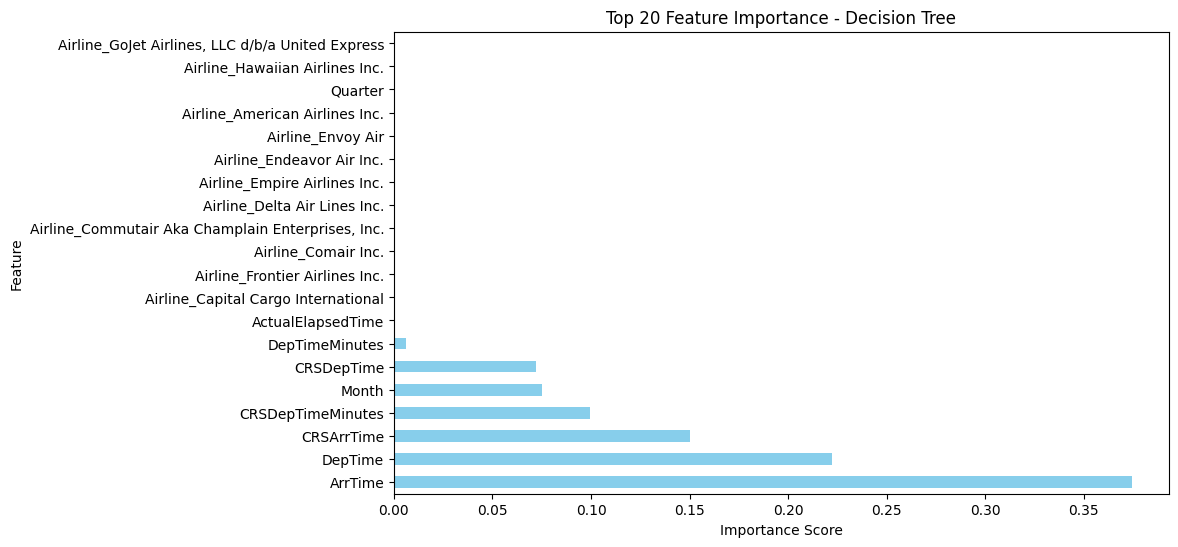

In [105]:
# Baseline Model 1B
#DECISION TREE (with feature importance)

dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Feature Importance
feature_importance = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Random Forest Metrics
Accuracy: 0.9542618904050684
Precision: 0.8554844201356503
Recall: 0.8845195962773627
F1 Score: 0.8697597554744356
ROC-AUC Score: 0.9863992890527016

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97   1023562
         1.0       0.86      0.88      0.87    213612

    accuracy                           0.95   1237174
   macro avg       0.92      0.93      0.92   1237174
weighted avg       0.95      0.95      0.95   1237174



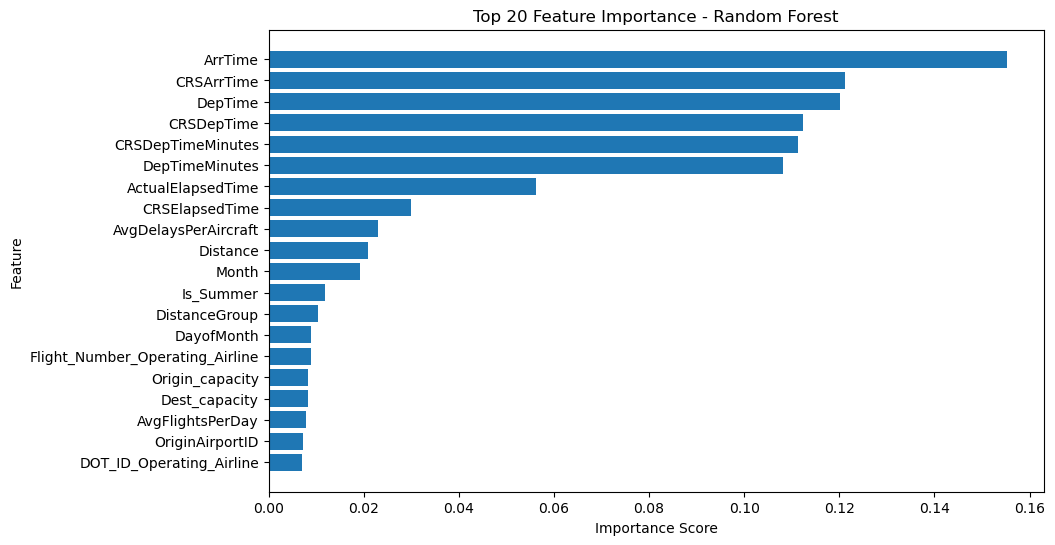

In [ ]:
# Baseline Model 1C (Takes ~10 minutes)
# RANDOM FOREST CLASSIFIER

rf = RandomForestClassifier(
    n_estimators=100, max_depth=20,class_weight='balanced',random_state=42)

# Fit
rf.fit(X_train, y_train, verbose=3)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate
print("Random Forest Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance Visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:20], feature_importances['Importance'][:20])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

## EVALUATION AND TUNING

### Evaluate baseline decision tree model

In [48]:
# IMPORTS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, precision_recall_curve, auc


Confusion Matrix:
[[804805 218757]
 [ 98100 115512]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84   1023562
         1.0       0.35      0.54      0.42    213612

    accuracy                           0.74   1237174
   macro avg       0.62      0.66      0.63   1237174
weighted avg       0.80      0.74      0.76   1237174



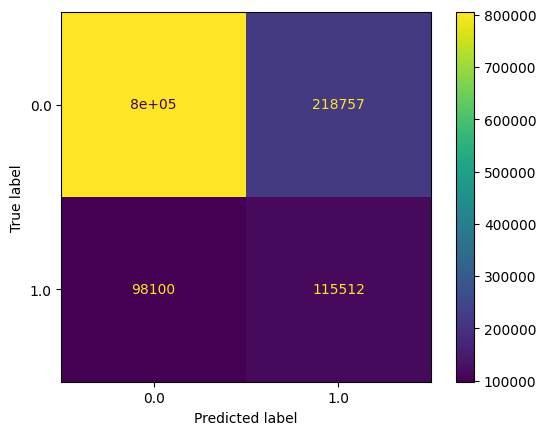

In [90]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

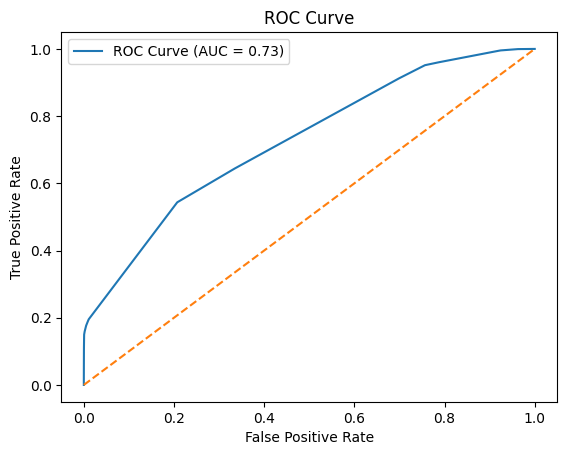

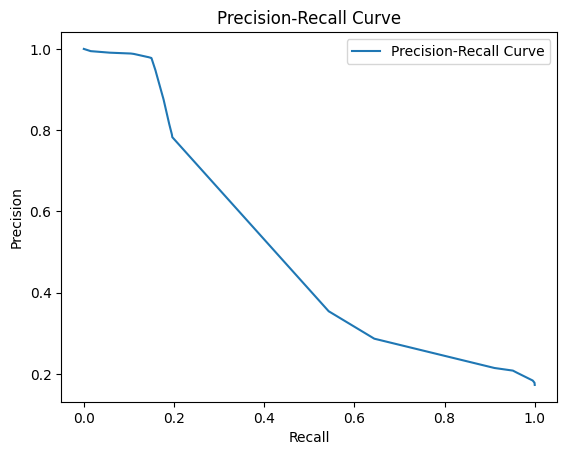

In [94]:
# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_prob_dt)

plt.figure()
plt.plot(recall_dt, precision_dt, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [95]:
# Cross-validation on baseline decision tree model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dt = cross_val_score(
    estimator=dt,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores_dt)
print("Mean F1-score:", cv_scores_dt.mean())
print("Standard deviation:", cv_scores_dt.std())


Cross-validated F1-scores: [0.42724722 0.4260373  0.43041478 0.42671051 0.42861533]
Mean F1-score: 0.4278050285594248
Standard deviation: 0.0015557232191711224


**Observation**
A standard deviation of ~0.0016 indicates the model is very consistent across folds, suggesting the model's performance is stable, even on different subsets of the data.

* The Good: The consistency across folds (low standard deviation) is a positive sign.
* The Bad: The F1-score itself is relatively low, suggesting the model is struggling to capture the patterns effectively.

In [52]:
y.value_counts()

ArrDel15
0.0    5117811
1.0    1068059
Name: count, dtype: int64

### Some X data cleaning

In [96]:
X.head()

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,...,"Airline_GoJet Airlines, LLC d/b/a United Express",Airline_Hawaiian Airlines Inc.,Airline_Horizon Air,Airline_JetBlue Airways,Airline_Mesa Airlines Inc.,Airline_Republic Airlines,Airline_SkyWest Airlines Inc.,Airline_Southwest Airlines Co.,Airline_Spirit Air Lines,Airline_United Air Lines Inc.
0,1,3,3,3,724,843,714.0,818.0,64.0,79.0,...,False,False,False,False,False,False,True,False,False,False
1,1,3,3,3,922,1040,917.0,1031.0,74.0,78.0,...,False,False,False,False,False,False,True,False,False,False
2,1,3,3,3,1330,1530,1321.0,1501.0,160.0,180.0,...,False,False,False,False,False,False,True,False,False,False
3,1,3,3,3,1645,2010,1636.0,2002.0,146.0,145.0,...,False,False,False,False,False,False,True,False,False,False
4,1,3,3,3,1844,1925,1838.0,1903.0,85.0,101.0,...,False,False,False,False,False,False,True,False,False,False


In [97]:
print(df_relevant_nonull.columns)

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'CRSArrTime', 'DepTime', 'ArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'DOT_ID_Operating_Airline',
       'Flight_Number_Operating_Airline', 'OriginAirportID', 'DestAirportID',
       'Distance', 'DistanceGroup', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups', 'CRSDepTimeMinutes', 'DepTimeMinutes',
       'Arr_deviation', 'AvgDelaysPerAircraft', 'AvgFlightsPerDay',
       'Origin_capacity', 'Dest_capacity', 'Is_Weekday', 'Is_Weekend',
       'Is_Fall', 'Is_Spring', 'Is_Summer', 'Is_Winter',
       'Airline_Air Wisconsin Airlines Corp', 'Airline_Alaska Airlines Inc.',
       'Airline_Allegiant Air', 'Airline_American Airlines Inc.',
       'Airline_Capital Cargo International', 'Airline_Comair Inc.',
       'Airline_Commutair Aka Champlain Enterprises, Inc.',
       'Airline_Delta Air Lines Inc.', 'Airline_Empire Airlines Inc.',


In [98]:
# removing features that are highly correlated with others to avoid multicolinearity
# removing other features that may afffect the results
# also removing features that would not normally be known before flight is delayed

# played around with the features here but no significant improvement


X_clean = (X
     .drop(columns=['Quarter',  # Higly correlated with month
                    'DistanceGroup',  # Higly correlated with distance
                    'ActualElapsedTime', # Higly correlated with CRSElapsedTime
                    'CRSDepTime',  # will keep crsdeptimeminutes
                    'DepTimeMinutes', 
                    'ArrTime',   # will not normally be known
                    'DepTime',   # will not normally be known
                    'CRSArrTime'  # highly correlated with CRSDepTime
                   ]))

In [99]:
X_clean.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSElapsedTime',
       'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'DestAirportID', 'Distance', 'CRSDepTimeMinutes',
       'AvgDelaysPerAircraft', 'AvgFlightsPerDay', 'Origin_capacity',
       'Dest_capacity', 'Is_Weekday', 'Is_Weekend', 'Is_Fall', 'Is_Spring',
       'Is_Summer', 'Is_Winter', 'Airline_Air Wisconsin Airlines Corp',
       'Airline_Alaska Airlines Inc.', 'Airline_Allegiant Air',
       'Airline_American Airlines Inc.', 'Airline_Capital Cargo International',
       'Airline_Comair Inc.',
       'Airline_Commutair Aka Champlain Enterprises, Inc.',
       'Airline_Delta Air Lines Inc.', 'Airline_Empire Airlines Inc.',
       'Airline_Endeavor Air Inc.', 'Airline_Envoy Air',
       'Airline_Frontier Airlines Inc.',
       'Airline_GoJet Airlines, LLC d/b/a United Express',
       'Airline_Hawaiian Airlines Inc.', 'Airline_Horizon Air',
       'Airline_JetBlue Airways', 'Airline_Mesa A

In [100]:
# train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [101]:
X_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSElapsedTime',
       'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'DestAirportID', 'Distance', 'CRSDepTimeMinutes',
       'AvgDelaysPerAircraft', 'AvgFlightsPerDay', 'Origin_capacity',
       'Dest_capacity', 'Is_Weekday', 'Is_Weekend', 'Is_Fall', 'Is_Spring',
       'Is_Summer', 'Is_Winter', 'Airline_Air Wisconsin Airlines Corp',
       'Airline_Alaska Airlines Inc.', 'Airline_Allegiant Air',
       'Airline_American Airlines Inc.', 'Airline_Capital Cargo International',
       'Airline_Comair Inc.',
       'Airline_Commutair Aka Champlain Enterprises, Inc.',
       'Airline_Delta Air Lines Inc.', 'Airline_Empire Airlines Inc.',
       'Airline_Endeavor Air Inc.', 'Airline_Envoy Air',
       'Airline_Frontier Airlines Inc.',
       'Airline_GoJet Airlines, LLC d/b/a United Express',
       'Airline_Hawaiian Airlines Inc.', 'Airline_Horizon Air',
       'Airline_JetBlue Airways', 'Airline_Mesa A

### Rerun Model 1B on newly cleaned data

Decision Tree Metrics
Accuracy: 0.6524522823790349
Precision: 0.26675191705739765
Recall: 0.5809651964760436
F1 Score: 0.36562569618927204
ROC-AUC Score: 0.6665443466873683

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.67      0.76   1023891
         1.0       0.27      0.58      0.37    213283

    accuracy                           0.65   1237174
   macro avg       0.58      0.62      0.56   1237174
weighted avg       0.78      0.65      0.69   1237174



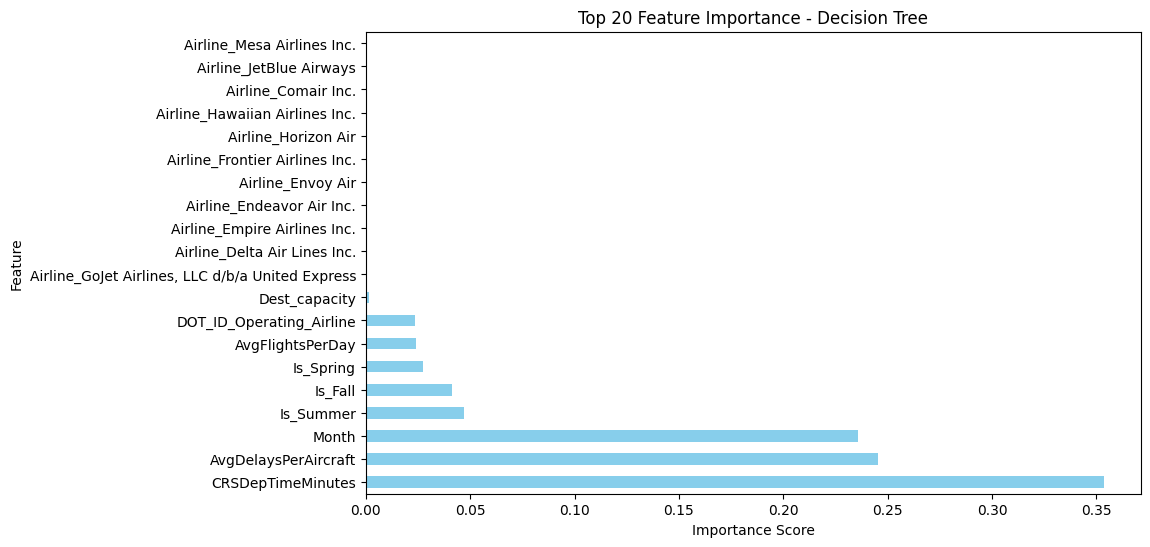

In [58]:
# Baseline Model 1B - on revised data
#DECISION TREE (with feature importance)

dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Feature Importance
feature_importance = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Confusion Matrix:
[[683287 340604]
 [ 89373 123910]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76   1023891
         1.0       0.27      0.58      0.37    213283

    accuracy                           0.65   1237174
   macro avg       0.58      0.62      0.56   1237174
weighted avg       0.78      0.65      0.69   1237174



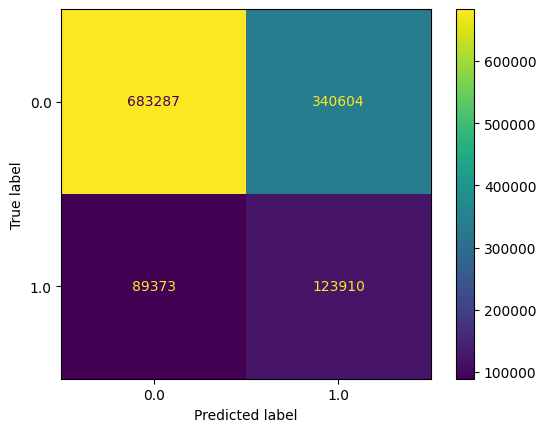

In [59]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

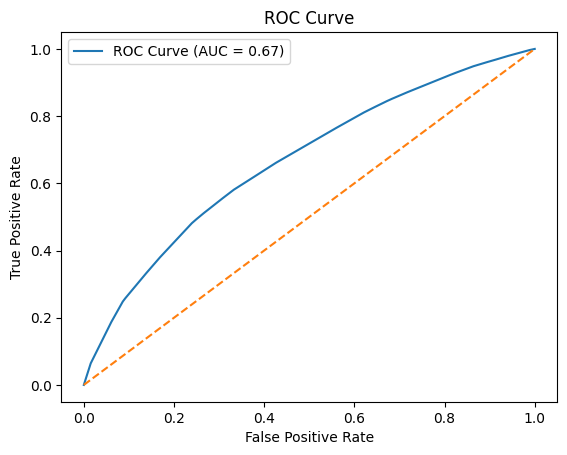

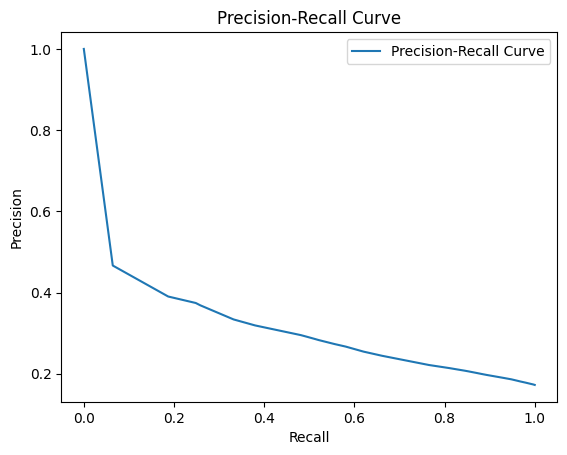

In [62]:
# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_prob_dt)

plt.figure()
plt.plot(recall_dt, precision_dt, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [60]:
# Cross-validation on baseline decision tree model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dt = cross_val_score(
    estimator=dt,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores_dt)
print("Mean F1-score:", cv_scores_dt.mean())
print("Standard deviation:", cv_scores_dt.std())


Cross-validated F1-scores: [0.36597488 0.36555316 0.36550852 0.36538126 0.36593063]
Mean F1-score: 0.36566969120863985
Standard deviation: 0.00023831811851137555


## **Resampling the Dataset**

### Oversampling the Minority Class (SMOTE)

SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class.

In [108]:
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE

# # Reduce dimensions for faster processing (optional)
# pca = PCA(n_components=20, random_state=42)
# X_train_reduced = pca.fit_transform(X_train)

# # Initialize SMOTE
# smote = SMOTE(k_neighbors=3, random_state=42)

# # Apply SMOTE on reduced dataset
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced, y_train)

# # Resample the training dataset
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Train the model on resampled data
# dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# dt.fit(X_train_resampled, y_train_resampled)


### dt_2: Undersampling the Majority Class
Undersampling removes samples from the majority class to balance the dataset.

Decision Tree Metrics
Accuracy: 0.6554615599745872
Precision: 0.2678167661302104
Recall: 0.5758921245481355
F1 Score: 0.36560848923218886
ROC-AUC Score: 0.6666210626924363

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.67      0.76   1023891
         1.0       0.27      0.58      0.37    213283

    accuracy                           0.66   1237174
   macro avg       0.58      0.62      0.56   1237174
weighted avg       0.78      0.66      0.69   1237174



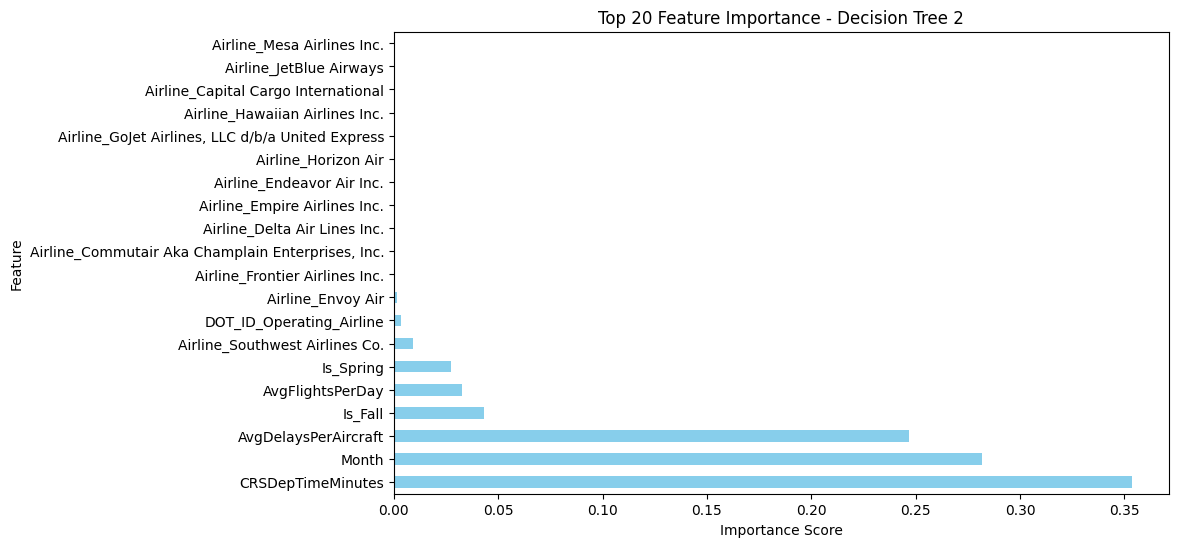

In [61]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
#rus = RandomUnderSampler(sampling_strategy={0: 500, 1: 500}, random_state=42)

# Resample the training dataset
X_train_resampled_dt_2, y_train_resampled_dt_2 = rus.fit_resample(X_train, y_train)

# Train and fit the model on resampled data
#dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt_2 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_2.fit(X_train_resampled_dt_2, y_train_resampled_dt_2)

# Predictions on the test set
y_pred_dt_2 = dt_2.predict(X_test)
y_pred_prob_dt_2 = dt_2.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_2))
print("Precision:", precision_score(y_test, y_pred_dt_2))
print("Recall:", recall_score(y_test, y_pred_dt_2))
print("F1 Score:", f1_score(y_test, y_pred_dt_2))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_2))

# Feature Importance
feature_importance_dt_2 = pd.Series(dt_2.feature_importances_, index=X_train_resampled_dt_2.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance_dt_2.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importance - Decision Tree 2")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Confusion Matrix:
[[688092 335799]
 [ 90455 122828]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76   1023891
         1.0       0.27      0.58      0.37    213283

    accuracy                           0.66   1237174
   macro avg       0.58      0.62      0.56   1237174
weighted avg       0.78      0.66      0.69   1237174



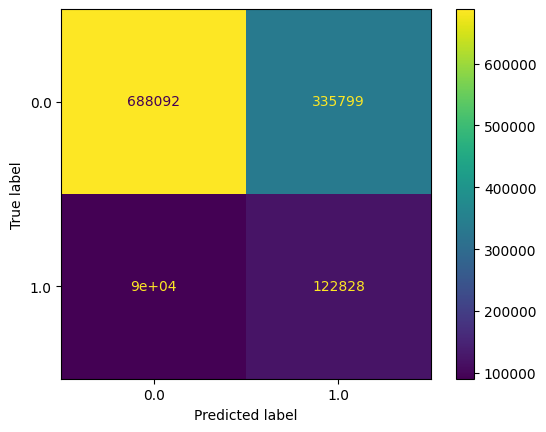

In [62]:
# Confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_dt_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=dt_2.classes_)
disp.plot()

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_2))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_2))

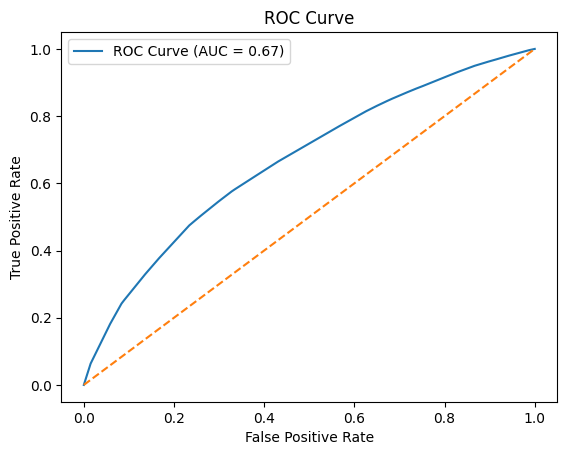

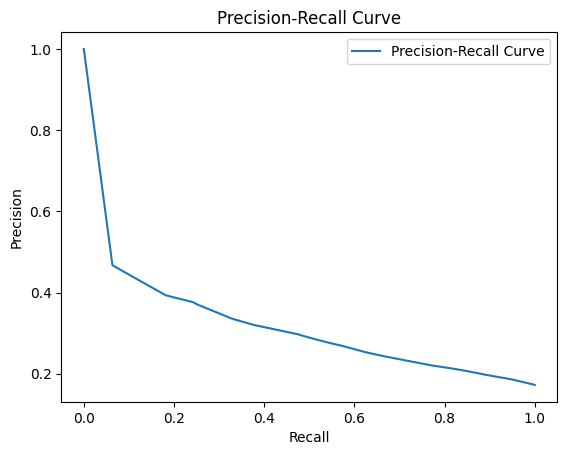

In [63]:
# ROC Curve
fpr_dt_2, tpr_dt_2, _ = roc_curve(y_test, y_pred_prob_dt_2)
roc_auc_dt_2 = auc(fpr_dt_2, tpr_dt_2)

plt.figure()
plt.plot(fpr_dt_2, tpr_dt_2, label=f'ROC Curve (AUC = {roc_auc_dt_2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_dt_2, recall_dt_2, _ = precision_recall_curve(y_test, y_pred_prob_dt_2)

plt.figure()
plt.plot(recall_dt_2, precision_dt_2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [64]:
# Cross-validation using undersampled model on full dataset

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dt_2 = cross_val_score(
    estimator=dt_2,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores_dt_2)
print("Mean F1-score:", cv_scores_dt_2.mean())
print("Standard deviation:", cv_scores_dt_2.std())


Cross-validated F1-scores: [0.06373083 0.06412153 0.06435129 0.06446511 0.06360952]
Mean F1-score: 0.0640556569710029
Standard deviation: 0.0003358391115659099


In [80]:
# Cross-validation using undersampled model on sampled dataset

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dt_2 = cross_val_score(
    estimator=dt_2,  # Your decision tree model
    X=X_train_resampled_dt_2,     # Training features
    y=y_train_resampled_dt_2,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores_dt_2)
print("Mean F1-score:", cv_scores_dt_2.mean())
print("Standard deviation:", cv_scores_dt_2.std())


Cross-validated F1-scores: [0.65037656 0.61834574 0.61956645 0.65298761 0.61837614]
Mean F1-score: 0.6319304983134916
Standard deviation: 0.016154225997992922


**Observation:** Undersampling was not helpul. Model performed worse.

### dt_3: Adjust class weights so that there is a stronger penalty for misclassifying Positives

Decision Tree Metrics
Accuracy: 0.45422875036171145
Precision: 0.219183028826338
Recall: 0.845229108742844
F1 Score: 0.3480980149841662
ROC-AUC Score: 0.6957334918834919

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.37      0.53   1023891
         1.0       0.22      0.85      0.35    213283

    accuracy                           0.45   1237174
   macro avg       0.57      0.61      0.44   1237174
weighted avg       0.80      0.45      0.50   1237174

CRSDepTimeMinutes                                   0.353557
AvgDelaysPerAircraft                                0.245309
Month                                               0.235913
Is_Summer                                           0.047114
Is_Fall                                             0.041200
Is_Spring                                           0.027546
AvgFlightsPerDay                                    0.024189
DOT_ID_Operating_Airline                           

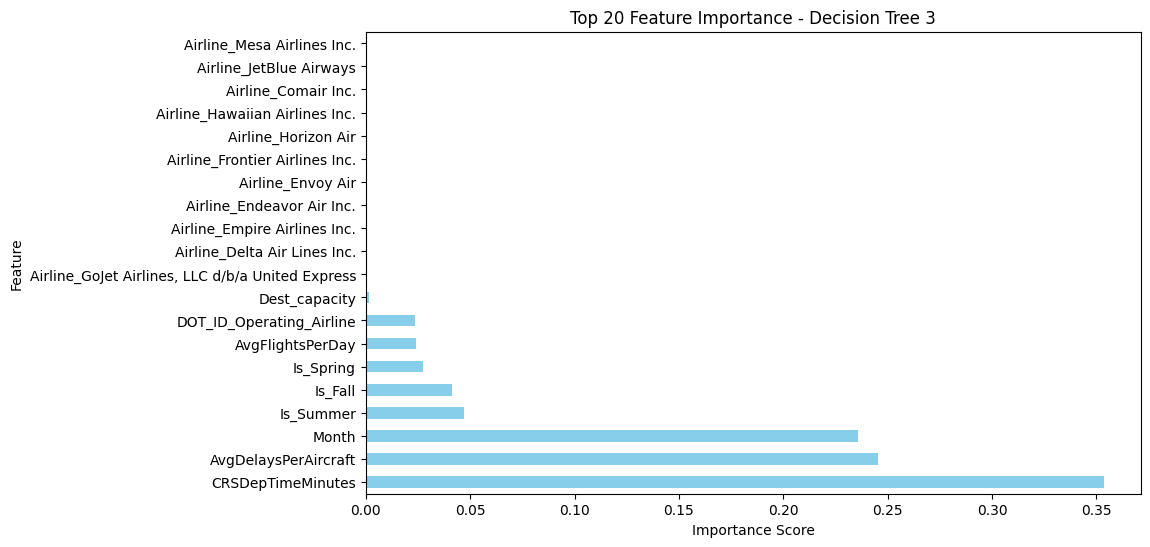

In [70]:
# Custom class weights (e.g., give more weight to minority class)
class_weights = {0: 1, 1: 8}

dt_3 = DecisionTreeClassifier(
    max_depth=10,
    class_weight=class_weights,
    random_state=42
)

dt_3.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt_3 = dt_3.predict(X_test)
y_pred_prob_dt_3 = dt_3.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_3))
print("Precision:", precision_score(y_test, y_pred_dt_3))
print("Recall:", recall_score(y_test, y_pred_dt_3))
print("F1 Score:", f1_score(y_test, y_pred_dt_3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt_3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_3))

# Feature Importance
feature_importance_3 = pd.Series(dt_3.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# # Plot ROC Curve
# RocCurveDisplay.from_estimator(dt, X_test, y_test)
# plt.title("ROC Curve")
# plt.show()

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh', color='skyblue')
print(feature_importance.head(20))
plt.title("Top 20 Feature Importance - Decision Tree 3")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Confusion Matrix:
[[381687 642204]
 [ 33010 180273]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.37      0.53   1023891
         1.0       0.22      0.85      0.35    213283

    accuracy                           0.45   1237174
   macro avg       0.57      0.61      0.44   1237174
weighted avg       0.80      0.45      0.50   1237174



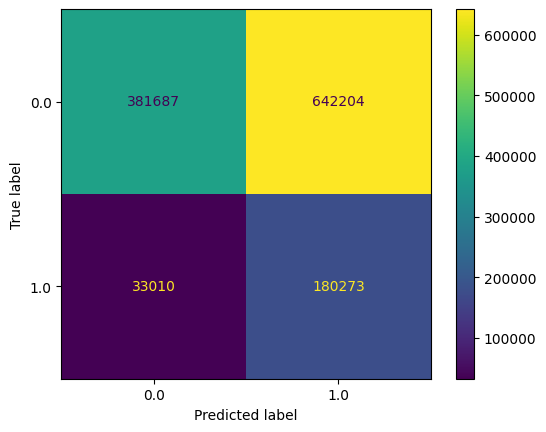

In [71]:
# Confusion matrix
cm_3 = confusion_matrix(y_test, y_pred_dt_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=dt_3.classes_)
disp_3.plot()

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_3))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_3))

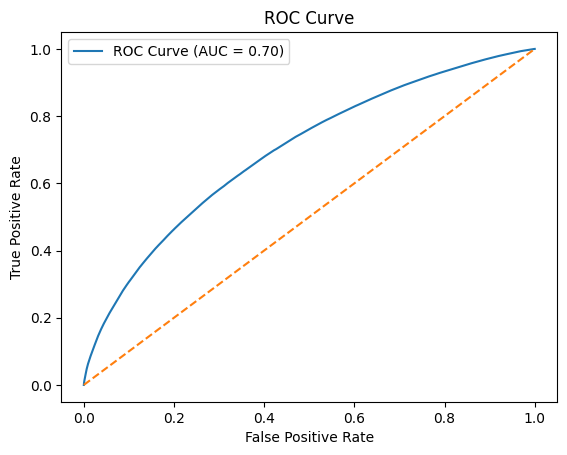

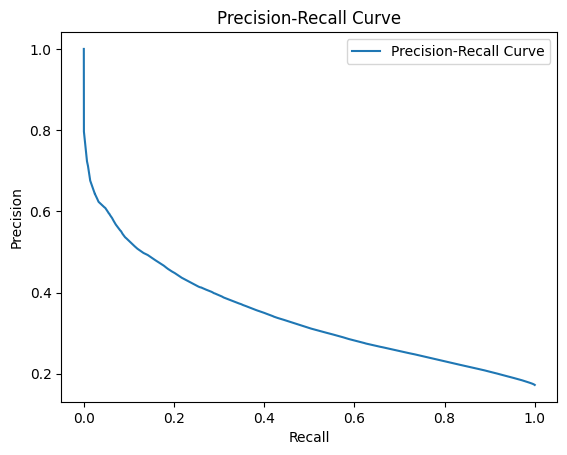

In [72]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC Curve
fpr_3, tpr_3, _ = roc_curve(y_test, y_pred_prob_dt_3)
roc_auc_3 = auc(fpr_3, tpr_3)

plt.figure()
plt.plot(fpr_3, tpr_3, label=f'ROC Curve (AUC = {roc_auc_3:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_3, recall_3, _ = precision_recall_curve(y_test, y_pred_prob_dt_3)

plt.figure()
plt.plot(recall_3, precision_3, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [73]:
# Cross-validation on adjusted class model

# Perform 5-fold cross-validation
cv_scores_dt_3 = cross_val_score(
    estimator=dt_3,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores_dt_3)
print("Mean F1-score:", cv_scores_dt_3.mean())
print("Standard deviation:", cv_scores_dt_3.std())


Cross-validated F1-scores: [0.34776407 0.34842095 0.34862152 0.34683364 0.34999557]
Mean F1-score: 0.3483271487715013
Standard deviation: 0.001041795536427253


**Observation:** Penalizing the misclassification of positives improved the model seemingly significantly as seen in the 2X improvement from the baseline decision tree model.

### dt_3b: Increase class weights 

Decision Tree Metrics
Accuracy: 0.6443984435495734
Precision: 0.2722075938172097
Recall: 0.634959185682872
F1 Score: 0.38105608805939284
ROC-AUC Score: 0.6960616836652348

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.65      0.75   1023891
         1.0       0.27      0.63      0.38    213283

    accuracy                           0.64   1237174
   macro avg       0.58      0.64      0.57   1237174
weighted avg       0.79      0.64      0.69   1237174



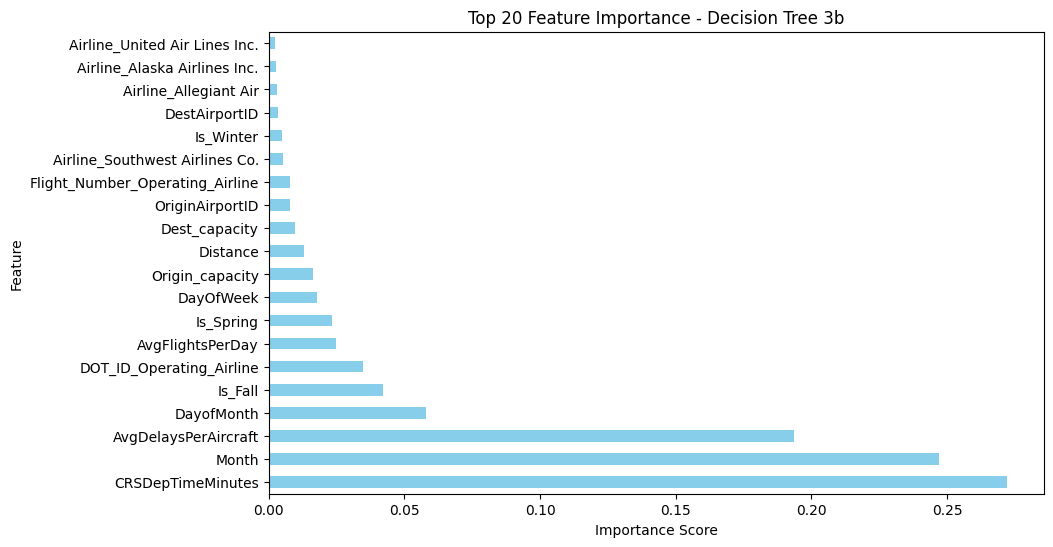

In [74]:
# Custom class weights (e.g., give more weight to minority class)
class_weights = {0: 1, 1: 5}  # Adjust based on dataset

dt_3b = DecisionTreeClassifier(
    max_depth=10,
    class_weight=class_weights,
    random_state=42
)

dt_3b.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt_3b = dt_3b.predict(X_test)
y_pred_prob_dt_3b = dt_3b.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_3b))
print("Precision:", precision_score(y_test, y_pred_dt_3b))
print("Recall:", recall_score(y_test, y_pred_dt_3b))
print("F1 Score:", f1_score(y_test, y_pred_dt_3b))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt_3b))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_3b))

# Feature Importance
feature_importance_3b = pd.Series(dt_3b.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# # Plot ROC Curve
# RocCurveDisplay.from_estimator(dt, X_test, y_test)
# plt.title("ROC Curve")
# plt.show()

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance_3b.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importance - Decision Tree 3b")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Confusion Matrix:
[[661807 362084]
 [ 77857 135426]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75   1023891
         1.0       0.27      0.63      0.38    213283

    accuracy                           0.64   1237174
   macro avg       0.58      0.64      0.57   1237174
weighted avg       0.79      0.64      0.69   1237174



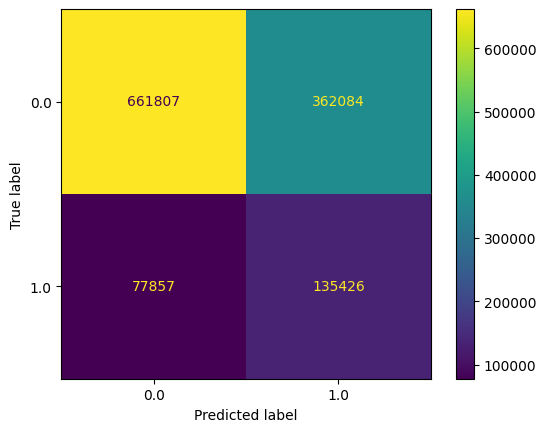

In [75]:
# Confusion matrix
cm_3b = confusion_matrix(y_test, y_pred_dt_3b)
disp_3b = ConfusionMatrixDisplay(confusion_matrix=cm_3b, display_labels=dt_3b.classes_)
disp_3b.plot()

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_3b))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_3b))

In [76]:
# Cross-validation on original model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dt_3b = cross_val_score(
    estimator=dt_3b,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores_dt_3b)
print("Mean F1-score:", cv_scores_dt_3b.mean())
print("Standard deviation:", cv_scores_dt_3b.std())


Cross-validated F1-scores: [0.37944454 0.38146373 0.37961409 0.37983959 0.38232942]
Mean F1-score: 0.3805382742621363
Standard deviation: 0.0011491916081202555


**Observation:** Recall is improving but precision on positives has gone down.

#### dt_3c: Less aggressive penalty

Decision Tree Metrics
Accuracy: 0.8171114168257658
Precision: 0.44089957206592006
Recall: 0.22704106750186373
F1 Score: 0.29973414873434373
ROC-AUC Score: 0.6936962382868734

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89   1023891
         1.0       0.44      0.23      0.30    213283

    accuracy                           0.82   1237174
   macro avg       0.65      0.58      0.60   1237174
weighted avg       0.78      0.82      0.79   1237174



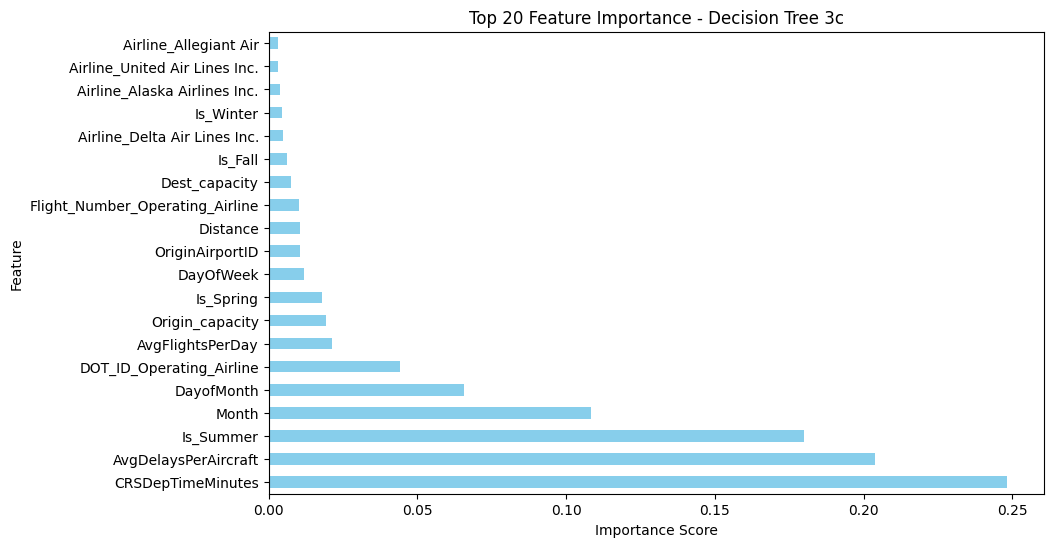

In [78]:
# Custom class weights (e.g., give more weight to minority class)
class_weights = {0: 1, 1: 2}  # Adjust based on dataset

dt_3c = DecisionTreeClassifier(
    max_depth=10,
    class_weight=class_weights,
    random_state=42
)

dt_3c.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt_3c = dt_3c.predict(X_test)
y_pred_prob_dt_3c = dt_3c.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_3c))
print("Precision:", precision_score(y_test, y_pred_dt_3c))
print("Recall:", recall_score(y_test, y_pred_dt_3c))
print("F1 Score:", f1_score(y_test, y_pred_dt_3c))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt_3c))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_3c))

# Feature Importance
feature_importance_3c = pd.Series(dt_3c.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance_3c.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importance - Decision Tree 3c")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Confusion Matrix:
[[962485  61406]
 [164859  48424]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89   1023891
         1.0       0.44      0.23      0.30    213283

    accuracy                           0.82   1237174
   macro avg       0.65      0.58      0.60   1237174
weighted avg       0.78      0.82      0.79   1237174



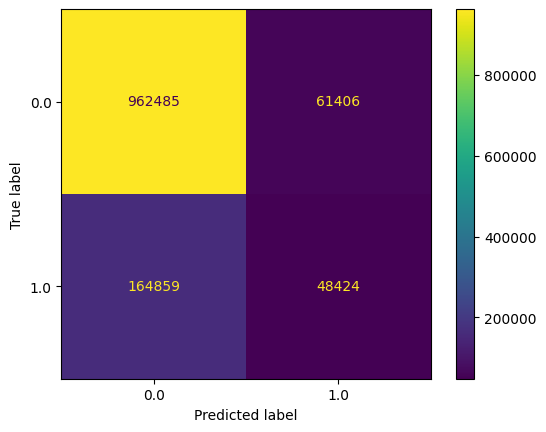

In [79]:
# Confusion matrix
cm_3c = confusion_matrix(y_test, y_pred_dt_3c)
disp_3c = ConfusionMatrixDisplay(confusion_matrix=cm_3c, display_labels=dt_3c.classes_)
disp_3c.plot()

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_3c))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_3c))

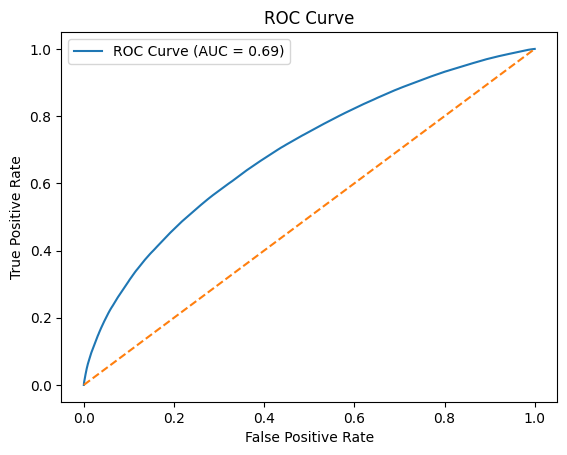

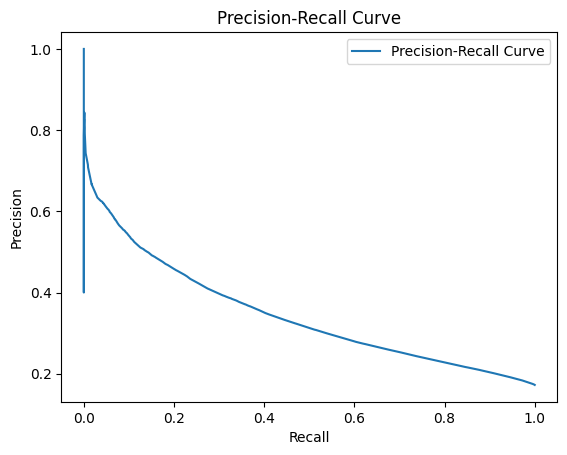

In [80]:
# ROC Curve
fpr_3c, tpr_3c, _ = roc_curve(y_test, y_pred_prob_dt_3c)
roc_auc_3c = auc(fpr_3c, tpr_3c)

plt.figure()
plt.plot(fpr_3c, tpr_3c, label=f'ROC Curve (AUC = {roc_auc_3c:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_3c, recall_3c, _ = precision_recall_curve(y_test, y_pred_prob_dt_3c)

plt.figure()
plt.plot(recall_3c, precision_3c, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [81]:
# Cross-validation on original model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dt_3c = cross_val_score(
    estimator=dt_3c,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores_dt_3c)
print("Mean F1-score:", cv_scores_dt_3c.mean())
print("Standard deviation:", cv_scores_dt_3c.std())


Cross-validated F1-scores: [0.29103767 0.30229665 0.32013158 0.29130882 0.32044287]
Mean F1-score: 0.3050435191521099
Standard deviation: 0.013093058011691324


**Observation:** Accuracy is up but recall and precision are not.

## **Feature Engineering**

### After reviewing the top features in the improved decision trees, I decided to do some feature engineering

In [82]:
X_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSElapsedTime',
       'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'DestAirportID', 'Distance', 'CRSDepTimeMinutes',
       'AvgDelaysPerAircraft', 'AvgFlightsPerDay', 'Origin_capacity',
       'Dest_capacity', 'Is_Weekday', 'Is_Weekend', 'Is_Fall', 'Is_Spring',
       'Is_Summer', 'Is_Winter', 'Airline_Air Wisconsin Airlines Corp',
       'Airline_Alaska Airlines Inc.', 'Airline_Allegiant Air',
       'Airline_American Airlines Inc.', 'Airline_Capital Cargo International',
       'Airline_Comair Inc.',
       'Airline_Commutair Aka Champlain Enterprises, Inc.',
       'Airline_Delta Air Lines Inc.', 'Airline_Empire Airlines Inc.',
       'Airline_Endeavor Air Inc.', 'Airline_Envoy Air',
       'Airline_Frontier Airlines Inc.',
       'Airline_GoJet Airlines, LLC d/b/a United Express',
       'Airline_Hawaiian Airlines Inc.', 'Airline_Horizon Air',
       'Airline_JetBlue Airways', 'Airline_Mesa A

In [80]:
# One-hot encode day of the week and month
X_train = pd.get_dummies(X_train, columns=['DayOfWeek', 'Month'], drop_first=True).astype(int)  # drop_first avoids multicollinearity
X_test = pd.get_dummies(X_test, columns=['DayOfWeek', 'Month'], drop_first=True).astype(int)


In [81]:
X_train.head()

,DayofMonth,CRSElapsedTime,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,DestAirportID,Distance,CRSDepTimeMinutes,AvgDelaysPerAircraft,AvgFlightsPerDay,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
284909,13,161,20368,1639,11721,14082,1111,643,19,306,...,1,0,0,0,0,0,0,0,0,0
1905869,28,206,20416,1145,15016,12889,1371,1173,12,507,...,0,0,0,0,0,0,0,0,1,0
3236399,29,108,19977,2198,13930,12264,588,420,8,1204,...,0,0,0,0,0,1,0,0,0,0
33826,4,124,20304,5251,13851,13930,693,474,13,2021,...,1,0,0,0,0,0,0,0,0,0
965580,30,85,19687,2581,10713,14057,344,1065,7,299,...,0,0,0,0,0,0,0,0,0,1


### Try decision tree model on OHE data

Plus some pruning

In [87]:
# Custom class weights (e.g., give more weight to minority class)
class_weights = {0: 1, 1: 3}  # Increase 3 to 4

# dt = DecisionTreeClassifier(
#     max_depth=10,
#     class_weight=class_weights,
#     random_state=42
# )

#Tried some pruning to prevent overfitting
dt_ = DecisionTreeClassifier(
    max_depth=10,
#    min_samples_split=10,  # Prevent splits on small nodes
    min_samples_leaf=5,    # Ensure leaves have sufficient samples
    max_leaf_nodes=10,     # Limit the number of leaves
    class_weight=class_weights,
    random_state=42
)

dt.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Feature Importance
feature_importance = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Decision Tree Metrics
Accuracy: 0.8005632190783188
Precision: 0.3725980030008302
Recall: 0.22937130479222442
F1 Score: 0.28394567299320916
ROC-AUC Score: 0.6452783721796058

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88   1023891
         1.0       0.37      0.23      0.28    213283

    accuracy                           0.80   1237174
   macro avg       0.61      0.57      0.58   1237174
weighted avg       0.77      0.80      0.78   1237174



NameError: name 'RocCurveDisplay' is not defined

In [88]:
# Cross-validation on original model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    estimator=dt,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores)
print("Mean F1-score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validated F1-scores: [0.28185978 0.28389112 0.28432422 0.28288737 0.28285478]
Mean F1-score: 0.2831634527837658
Standard deviation: 0.0008657883109401386


## **Evaluating by optimal thresholds**

In [89]:
# Optimal threshold baseline dt
from sklearn.metrics import precision_recall_curve, f1_score

# Generate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob_dt)

# Compute F1 scores for each threshold
f1_scores_dt = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold that maximizes F1 score
optimal_idx_dt = f1_scores_dt.argmax()
optimal_threshold_dt = thresholds[optimal_idx_dt]

print("Optimal Threshold:", optimal_threshold_dt)


Optimal Threshold: 0.4532605203983296


In [90]:
# Apply the Optimal Threshold Make predictions based on the optimal threshold

y_pred_optimal_dt = (y_pred_prob_dt >= optimal_threshold_dt).astype(int)

In [91]:
# Evaluate Results Evaluate the model with the optimal threshold using metrics like confusion matrix, precision, recall, and F1 score:

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_optimal_dt))
print(classification_report(y_test, y_pred_optimal_dt))

[[784264 239627]
 [115939  97344]]
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82   1023891
         1.0       0.29      0.46      0.35    213283

    accuracy                           0.71   1237174
   macro avg       0.58      0.61      0.58   1237174
weighted avg       0.77      0.71      0.74   1237174



In [92]:
# Optimal threshold dt_2

# Generate precision, recall, and thresholds
precisions_dt_2, recalls_dt_2, thresholds_dt_2 = precision_recall_curve(y_test, y_pred_prob_dt_2)

# Compute F1 scores for each threshold
f1_scores_dt_2 = 2 * (precisions_dt_2 * recalls_dt_2) / (precisions_dt_2 + recalls_dt_2)

# Find the threshold that maximizes F1 score
optimal_idx_dt_2 = f1_scores_dt_2.argmax()
optimal_threshold_dt_2 = thresholds_dt_2[optimal_idx_dt_2]

print("Optimal Threshold:", optimal_threshold_dt_2)


Optimal Threshold: 0.5158178952132724


In [93]:
# Apply the Optimal Threshold Make predictions based on the optimal threshold

y_pred_optimal_dt_2 = (y_pred_prob_dt_2 >= optimal_threshold_dt_2).astype(int)

In [94]:
# Evaluate Results Evaluate the model with the optimal threshold using metrics like confusion matrix, precision, recall, and F1 score:

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_optimal_dt_2))
print(classification_report(y_test, y_pred_optimal_dt_2))

[[720202 303689]
 [ 97346 115937]]
              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78   1023891
         1.0       0.28      0.54      0.37    213283

    accuracy                           0.68   1237174
   macro avg       0.58      0.62      0.57   1237174
weighted avg       0.78      0.68      0.71   1237174



In [95]:
# Optimal threshold dt_3

# Generate precision, recall, and thresholds
precisions_dt_3, recalls_dt_3, thresholds_dt_3 = precision_recall_curve(y_test, y_pred_prob_dt_3)

# Compute F1 scores for each threshold
f1_scores_dt_3 = 2 * (precisions_dt_3 * recalls_dt_3) / (precisions_dt_3 + recalls_dt_3)

# Find the threshold that maximizes F1 score
optimal_idx_dt_3 = f1_scores_dt_3.argmax()
optimal_threshold_dt_3 = thresholds_dt_3[optimal_idx_dt_3]

print("Optimal Threshold:", optimal_threshold_dt_3)


Optimal Threshold: 0.4227594339622642


In [96]:
# Apply the Optimal Threshold Make predictions based on the optimal threshold

y_pred_optimal_dt_3 = (y_pred_prob_dt_3 >= optimal_threshold_dt_3).astype(int)

In [107]:
# Evaluate Results Evaluate the model with the optimal threshold using metrics like confusion matrix, precision, recall, and F1 score:

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_optimal_dt_3))
print(classification_report(y_test, y_pred_optimal_dt_3))

NameError: name 'y_pred_optimal_dt_3' is not defined

In [106]:
# Optimal threshold dt_3b

# Generate precision, recall, and thresholds
precisions_dt_3b, recalls_dt_3b, thresholds_dt_3b = precision_recall_curve(y_test, y_pred_prob_dt_3b)

# Compute F1 scores for each threshold
f1_scores_dt_3b = 2 * (precisions_dt_3b * recalls_dt_3b) / (precisions_dt_3b + recalls_dt_3b)

# Find the threshold that maximizes F1 score
optimal_idx_dt_3b = f1_scores_dt_3b.argmax()
optimal_threshold_dt_3b = thresholds_dt_3b[optimal_idx_dt_3b]

print("Optimal Threshold:", optimal_threshold_dt_3b)


Optimal Threshold: 1.0


/var/folders/1y/c9fmptqd3h3_9blzbn4kr9z80000gn/T/ipykernel_6134/3376548930.py:7: RuntimeWarning: invalid value encountered in divide
  f1_scores_dt_3b = 2 * (precisions_dt_3b * recalls_dt_3b) / (precisions_dt_3b + recalls_dt_3b)


In [128]:
# Apply the Optimal Threshold Make predictions based on the optimal threshold

y_pred_optimal_dt_3b = (y_pred_prob_dt_3b >= optimal_threshold_dt_3b).astype(int)

In [129]:
# Evaluate Results Evaluate the model with the optimal threshold using metrics like confusion matrix, precision, recall, and F1 score:

print(confusion_matrix(y_test, y_pred_optimal_dt_3b))
print(classification_report(y_test, y_pred_optimal_dt_3b))

[[1010123   13439]
 [  98661  114951]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95   1023562
         1.0       0.90      0.54      0.67    213612

    accuracy                           0.91   1237174
   macro avg       0.90      0.76      0.81   1237174
weighted avg       0.91      0.91      0.90   1237174



In [99]:
# Optimal threshold dt_3c

# Generate precision, recall, and thresholds
precisions_dt_3c, recalls_dt_3c, thresholds_dt_3c = precision_recall_curve(y_test, y_pred_prob_dt_3c)

# Compute F1 scores for each threshold
f1_scores_dt_3c = 2 * (precisions_dt_3c * recalls_dt_3c) / (precisions_dt_3c + recalls_dt_3c)

# Find the threshold that maximizes F1 score
optimal_idx_dt_3c = f1_scores_dt_3c.argmax()
optimal_threshold_dt_3c = thresholds_dt_3c[optimal_idx_dt_3c]

print("Optimal Threshold:", optimal_threshold_dt_3c)


Optimal Threshold: 0.32644628099173556


In [100]:
# Apply the Optimal Threshold Make predictions based on the optimal threshold

y_pred_optimal_dt_3c = (y_pred_prob_dt_3c >= optimal_threshold_dt_3c).astype(int)

In [101]:
# Evaluate Results Evaluate the model with the optimal threshold using metrics like confusion matrix, precision, recall, and F1 score:

print(confusion_matrix(y_test, y_pred_optimal_dt_3c))
print(classification_report(y_test, y_pred_optimal_dt_3c))

[[768961 254930]
 [101580 111703]]
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81   1023891
         1.0       0.30      0.52      0.39    213283

    accuracy                           0.71   1237174
   macro avg       0.59      0.64      0.60   1237174
weighted avg       0.78      0.71      0.74   1237174



### **Compare diferent models**

In [86]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Metrics for visualization
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# baseline_dt_values = [0.7573, 0.3908, 0.7261, 0.5081]  # Baseline metrics
# best_threshold_values = [0.8405, 0.5363, 0.5634, 0.5495]  # Best threshold metrics

# # Bar chart to compare metrics
# x = np.arange(len(metrics))  # label locations
# width = 0.35  # width of the bars

# fig, ax = plt.subplots(figsize=(8, 6))
# bars1 = ax.bar(x - width/2, baseline_values, width, label='Baseline (Threshold = 0.5)')
# bars2 = ax.bar(x + width/2, best_threshold_values, width, label='Best Threshold (0.6217)')


# ax.set_ylabel('Metric Value')
# ax.set_title('Comparison of Metrics: Baseline vs Best Threshold')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics)
# ax.legend()

# # Value labels on the bars
# def add_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}',
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# add_labels(bars1)
# add_labels(bars2)

# plt.tight_layout()
# plt.show()

In [85]:
# Plot by metric

# Updated metrics and corresponding values (excluding F1 Score)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score (cross-validated)']
baseline_dt_values = [baseline_dt_values[0], baseline_dt_values[1], baseline_dt_values[2], baseline_dt_values[4]]  # Exclude F1 Score
dt_2_values = [dt_2_values[0], dt_2_values[1], dt_2_values[2], dt_2_values[4]]  # Exclude F1 Score
dt_3_values = [dt_3_values[0], dt_3_values[1], dt_3_values[2], dt_3_values[4]]  # Exclude F1 Score
dt_3b_values = [dt_3b_values[0], dt_3b_values[1], dt_3b_values[2], dt_3b_values[4]]  # Exclude F1 Score
dt_3c_values = [dt_3c_values[0], dt_3c_values[1], dt_3c_values[2], dt_3c_values[4]]  # Exclude F1 Score

fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 2 rows, 3 columns layout

# Colors for each group
colors = ['steelblue', 'darkorange', 'green', 'red', 'black']

# Data for each group
group_values = [baseline_dt_values, dt_2_values, dt_3_values, dt_3b_values, dt_3c_values]
group_labels = ['Baseline dt', 'dt_2', 'dt_3', 'dt_3b', 'dt_3c']

# Flatten axes for easier looping
axes = axes.flatten()

# Iterate through metrics and create a bar chart for each metric
for idx, metric in enumerate(metrics):
    ax = axes[idx]  # Select subplot
    values = [group[idx] for group in group_values]  # Get values for the current metric
    ax.bar(group_labels, values, color=colors)  # Bar plot for the current metric
    
    # Add metric-specific titles and labels
    ax.set_title(metric)
    ax.set_ylim(0, 1)  # Ensure consistent y-axis scaling
    ax.set_xticks(range(len(group_labels)))
    ax.set_xticklabels(group_labels, rotation=45, ha='right')  # Rotate labels for better readability
    
    # Add value annotations on the bars
    for i, v in enumerate(values):
        ax.text(i, v + 0.02, f"{v:.2f}", ha='center')

# Remove any unused subplot (e.g., 5th and 6th subplot in a 4-metric case)
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

# Overall layout adjustments
fig.suptitle('Comparison of Metrics Across Models (Excluding F1 Score)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()


NameError: name 'baseline_dt_values' is not defined

NameError: name 'dt_values' is not defined

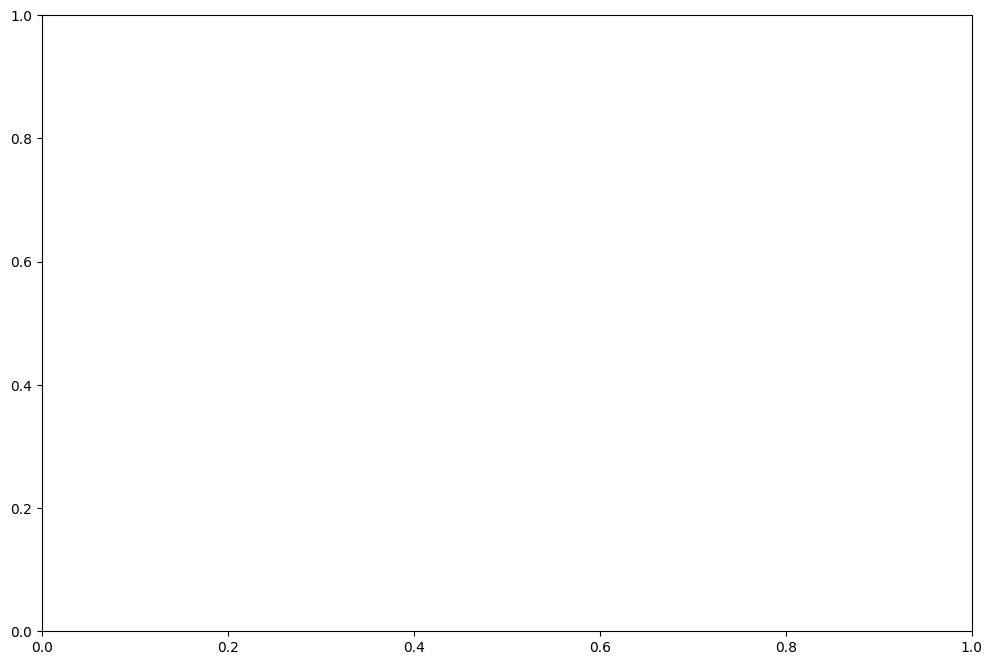

In [84]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

# Bar chart to compare metrics
# Metrics for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

# Define custom colors for each group
colors_baseline = 'steelblue'
colors_dt2 = 'darkorange'
colors_dt3 = 'green'
colors_dt3b = 'red'
colors_dt3c = 'purple'

# Create the bars with custom colors
bars1 = ax.bar(x - 2 * width / 3, dt_values, width / 3, label='Baseline dt', color=colors_baseline)
bars2 = ax.bar(x - width / 3, dt_2_values, width / 3, label='dt_2', color=colors_dt2)
bars3 = ax.bar(x, dt_3_values, width / 3, label='dt_3', color=colors_dt3)
bars3b = ax.bar(x + width / 3, dt_3b_values, width / 3, label='dt_3b', color=colors_dt3b)
bars3c = ax.bar(x + 2 * width / 3, dt_3c_values, width / 3, label='dt_3c', color=colors_dt3c)

# Set the labels and title
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Metrics: Baseline vs Best Threshold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars3b)
add_labels(bars3c)

plt.tight_layout()
plt.show()


## **Ensemble Tree Algorithm**

### XGBoost with Scale-Pos-Weight
In XGBoost, scale_pos_weight balances the dataset by weighting the minority class.

XGBoost Metrics
Accuracy: 0.9299185078250917
Precision: 0.7581602554974674
Recall: 0.8723854465104957
F1 Score: 0.8112719222824205
ROC-AUC Score: 0.9724020633208834

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.96   1023562
         1.0       0.76      0.87      0.81    213612

    accuracy                           0.93   1237174
   macro avg       0.87      0.91      0.88   1237174
weighted avg       0.94      0.93      0.93   1237174



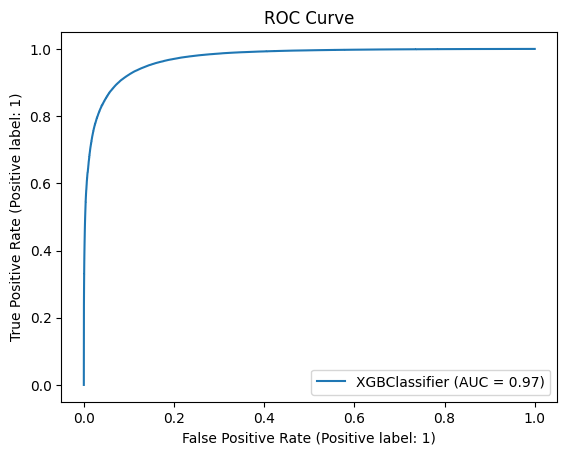

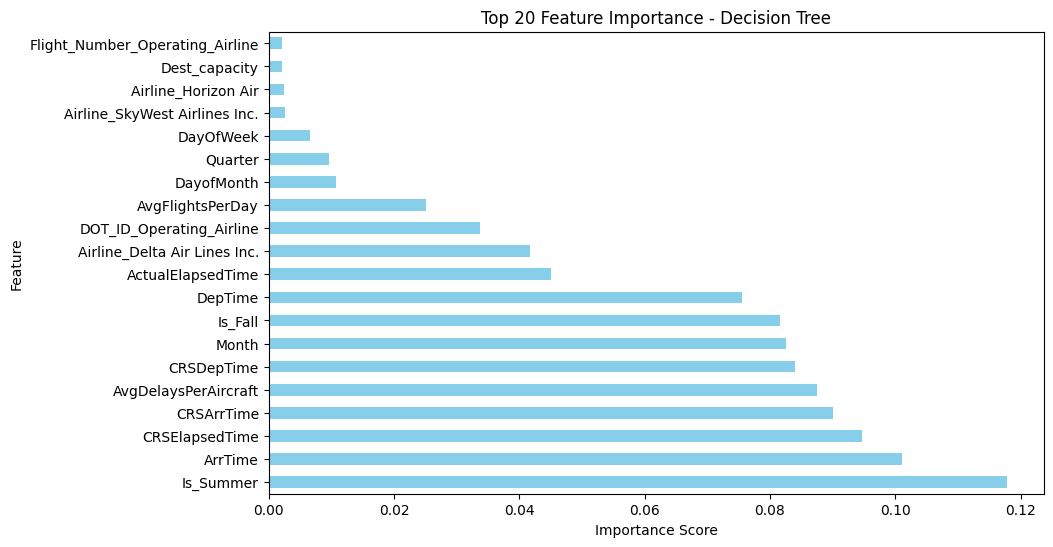

In [114]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the XGBoost Classifier
xgb = XGBClassifier(
    max_depth=5,                  # Same max depth for fair comparison
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle imbalance
    learning_rate=0.1,            # Step size shrinkage
    n_estimators=50,             # Number of trees
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Log-loss for evaluation
    random_state=42
)

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("XGBoost Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot ROC Curve
RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# Feature Importance
feature_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [115]:
# Cross-validation on original model

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    estimator=xgb,  # Your decision tree model
    X=X_train,     # Training features
    y=y_train,     # Training labels
    cv=5,          # Number of folds
    scoring='f1',  # Use F1-score or another appropriate metric
    n_jobs=-1      # Use all available processors
)

# Display results
print("Cross-validated F1-scores:", cv_scores)
print("Mean F1-score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validated F1-scores: [0.80229071 0.82954295 0.81089007 0.79580196 0.81538643]
Mean F1-score: 0.8107824260650093
Standard deviation: 0.011573153885978104


In [100]:
# Grid Search to find optimal parameters
from sklearn.model_selection import GridSearchCV

class_weights = {0: 1, 1: 3}

# Define parameter grid
param_grid = {
    #'max_depth': 10,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(max_depth=10, class_weight=class_weights, random_state=42),
    param_grid=param_grid,
    scoring='f1',  # F1 score for imbalanced classes
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=1  # Run on a single core
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [54]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],  # Needed for 'l1' penalty
    'class_weight': ['balanced']
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, max_iter=100),
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the model
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=1  # Disable parallel processing
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/dianachen/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 